<a href="https://colab.research.google.com/github/hochschule-pforzheim/project-st23-team-ccpl/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Relevanz des Projekts**
Der Wettbewerbsdruck um Kunden steigt – sowohl in Produkt- als auch Dienstleistungsmärkten – seit Jahren, insbesondere getrieben durch die digitale Transformation der Wirtschaft. Dies führt dazu, dass eine individuelle Kundenansprache immer mehr an Bedeutung gewinnt, um die Kunden an das Unternehmen / die Marke zu binden und dadurch das Risiko der Kundenabwanderung zu minimieren (vgl. Gouthier, Kern (2021), S.129).
Der Wettbewerbsdruck um Kunden ist jedoch nicht für alle Kunden gleich. Je höher der erwartete Customer Lifetime Value eines Kunden ist, desto intensiver ist der Wettbewerb um einen solchen Kunden (vgl. Barak et al. (2020), S.52).
Der Customer Lifetime Value erfasst, wie wertvoll ein Kunde für ein Unternehmen ist und bietet somit einen Ansatz zur individuellen Kundenansprache. Denn je größer der Customer Lifetime Value eines Kunden ist, desto rentabler sind Kundenbindungsmaßnahmen, je niedriger der Customer Lifetime Value eines Kunden ist, desto notwendiger sind Maßnahmen zur Minimierung des Abwanderungsrisikos des Kunden (vgl. Engelen, Schneider (2021), S.13).

Verwendeter Datensatz: https://www.kaggle.com/datasets/pankajjsh06/ibm-watson-marketing-customer-value-data


# **Vorgehen**

*Anmerkung: Wir sind von dem im Project Proposal beschriebenen Vorgehen abgewichen und haben uns stattdessen für folgende Vorgehensweise entschieden:*

**1. Data Preprocessing**

Um mit den vorliegenden Daten zielführende Analysen durchführen und Modelle entwickeln zu können, muss im ersten Schritt zunächst eine Aufbereitung der Daten erfolgen.

**2. Classification**

Zunächst gilt es, die Ist-Situation des Kundenstamms zu erfassen. Hierzu entwickeln wir ein Modell, welches auf Basis des Customer Lifetime Values für jeden einzelnen Kunden bestimmt, inwieweit dieser aktuell abwanderungsgefährdet ist (4 Kundenklassen auf Basis des Customer Lifetime Values: sehr abwanderungsgefährdet - gar nicht abwanderungsgefährdet).

**3. Regression**

Um das Unternehmen handlungsfähig zu machen, ist ein Blick in die Zukunft notwendig. Deshalb entwickeln wir im zweiten Schritt ein Modell, welches den Customer Lifetime Value für jeden einzelnen Kunden für die Zukunft vorhersagt.

**4. Clustering**

Mit dem Clustering wollen wir herausfinden, nach welchen weiteren Eigenschaften (abgesehen von dem Customer Lifetime Value) die Kunden in Gruppen eingeteilt werden können.


##**1. Data Preprocessing**

Grundlegende Vorbereitung zum Einlesen der Daten:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
#Daten einlesen
df = pd.read_csv("/content/sample_data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###**Cleansing**

Nachfolgend wird der Datensatz aufbereitet:


*   Umbenennung der Überschriften
*   Überprüfung auf fehlende Werte (--> um bspw. die Qualität des Datensatzes zu prüfen und zu gewährleisten, dass die statistischen Analysen ohne Verzerrungen durchgeführt werden können)

*   Überprüfung auf Duplikate (--> Verzerrung s.o.)

In [ ]:
#Überschriften umbenennen
df.columns = df.columns.str.replace(' ', '_')
df.head()

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,...,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
# Datensatz auf fehlende Werte überprüfen
df.isna().sum()

Customer                         0
State                            0
Customer_Lifetime_Value          0
Response                         0
Coverage                         0
Education                        0
Effective_To_Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location_Code                    0
Marital_Status                   0
Monthly_Premium_Auto             0
Months_Since_Last_Claim          0
Months_Since_Policy_Inception    0
Number_of_Open_Complaints        0
Number_of_Policies               0
Policy_Type                      0
Policy                           0
Renew_Offer_Type                 0
Sales_Channel                    0
Total_Claim_Amount               0
Vehicle_Class                    0
Vehicle_Size                     0
dtype: int64

In [ ]:
#Datensatz auf Duplikate überprüfen
df.duplicated().sum()

0

Wir sehen, dass es weder fehlende Werte noch Duplikate im Datensatz gibt, daher können wir annehmen, dass die Ergebnisse der nachfolgenden Analysen ohne Verzerrungen interpretierbar sind.

###Exploration

Überblick über den Datensatz und Informationen über die Datenstruktur und den Dateninhalt erhalten:

In [ ]:
df.describe()

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer_Lifetime_Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective_To_Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location_Code                  9134 non-null   object 
 11  Marital_Status                 9134 non-null   object 
 12  Monthly_Premium_Auto           9134 non-null   i

###**Encoding**

Wir betrachten im Folgenden Informationen über die Variable Customer Lifetime Value, da diese Werte anschließend die Grundlage für die Klassenbildung unserer Zielvariable CLV_Churn darstellen. Für die Festlegung der Grenzen der Klassen haben wir die Quartile (gerundet) verwendet, wodurch letztlich 4 Klassen entstehen (0,1,2,3).

In [ ]:
df.Customer_Lifetime_Value.describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer_Lifetime_Value, dtype: float64

In [ ]:
print(df.Customer_Lifetime_Value.min())
print(df.Customer_Lifetime_Value.max())

1898.007675
83325.38119


In [ ]:
# Zielvariable bestimmen (mehrere Kategorien)
from collections import Counter
from matplotlib import pyplot

CLV_churn = np.where(df.Customer_Lifetime_Value < 3994, 0, np.where(df.Customer_Lifetime_Value < 5780, 1, np.where(df.Customer_Lifetime_Value < 8962, 2, 3)))
CLV_churn

array([0, 2, 3, ..., 2, 2, 0])

In [ ]:
# In Data Frame umwandeln
df_1 = pd.DataFrame(CLV_churn,
                         columns=['CLV_churn'])
df_1

,CLV_churn
0,0
1,2
2,3
3,2
4,0
...,...
9129,3
9130,0
9131,2
9132,2


In [ ]:
# CLV_churn wieder an Datensatz anhängen
df_1 = pd.concat((df_1, df), axis=1)
df_1

,CLV_churn,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,...,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,2,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,3,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,2,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,0,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,3,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,0,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,2,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,2,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [ ]:
#Alt
#"Zielvariable" bestimmt: Alle mit CLV < 6000 sind Abwanderungsgefährdet (Da es ca. 50% sind) --> als extra Spalte dem Datensatz hinzugefügt
#df_1 = df.assign(CLV_churn = np.where(df['Customer_Lifetime_Value']<6000, 1, 0))
#df_1
#--> hier bei Classification zu hohe Werte

In [ ]:
#Datentypen anzeigen
df_1.dtypes

CLV_churn                          int64
Customer                          object
State                             object
Customer_Lifetime_Value          float64
Response                          object
Coverage                          object
Education                         object
Effective_To_Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location_Code                     object
Marital_Status                    object
Monthly_Premium_Auto               int64
Months_Since_Last_Claim            int64
Months_Since_Policy_Inception      int64
Number_of_Open_Complaints          int64
Number_of_Policies                 int64
Policy_Type                       object
Policy                            object
Renew_Offer_Type                  object
Sales_Channel                     object
Total_Claim_Amount               float64
Vehicle_Class                     object
Vehicle_Size    

In [ ]:
# Effective_To_Date in Datum transformiert
df_1['Effective_To_Date'] = pd.to_datetime(df_1['Effective_To_Date'])
df_1.dtypes

CLV_churn                                 int64
Customer                                 object
State                                    object
Customer_Lifetime_Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective_To_Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location_Code                            object
Marital_Status                           object
Monthly_Premium_Auto                      int64
Months_Since_Last_Claim                   int64
Months_Since_Policy_Inception             int64
Number_of_Open_Complaints                 int64
Number_of_Policies                        int64
Policy_Type                              object
Policy                                   object
Renew_Offer_Type                        

In [ ]:
df_1['EmploymentStatus'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

Einteilung der Variablen mit dem Datentyp "object" für die Codierung:

nominal (ohne Reihenfolge): State, EmploymentStatus, Gender, Marital_Status, Policy_Type, Policy, Renew_Offer_Type , Sales_Channel, Vehicle_Class, Response

ordinal (mit Reihenfolge): Coverage, Education, Location_Code, Vehicle_Size


In [ ]:
# Für nominal Werte Dummy erzeugen
dummy_liste = df_1.loc[:,['State','EmploymentStatus', 'Gender', 'Marital_Status', 'Policy_Type', 'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Vehicle_Class', 'Response']]
dummys=pd.get_dummies(dummy_liste)
dummys

,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,...,Sales_Channel_Call Center,Sales_Channel_Web,Vehicle_Class_Four-Door Car,Vehicle_Class_Luxury Car,Vehicle_Class_Luxury SUV,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Vehicle_Class_Two-Door Car,Response_No,Response_Yes
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,1,0,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0
9130,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9131,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
9132,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
# Dummys dem Datensatz hinzufügen
df_1_mitdummys = pd.concat((df_1, dummys), axis=1)
df_1_mitdummys = df_1_mitdummys.drop(['State','EmploymentStatus', 'Gender', 'Marital_Status', 'Policy_Type', 'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Vehicle_Class', 'Response'],1)
df_1_mitdummys.dtypes

<ipython-input-294-d38c3ed9cbd8>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


CLV_churn                                  int64
Customer                                  object
Customer_Lifetime_Value                  float64
Coverage                                  object
Education                                 object
Effective_To_Date                 datetime64[ns]
Income                                     int64
Location_Code                             object
Monthly_Premium_Auto                       int64
Months_Since_Last_Claim                    int64
Months_Since_Policy_Inception              int64
Number_of_Open_Complaints                  int64
Number_of_Policies                         int64
Total_Claim_Amount                       float64
Vehicle_Size                              object
State_Arizona                              uint8
State_California                           uint8
State_Nevada                               uint8
State_Oregon                               uint8
State_Washington                           uint8
EmploymentStatus_Dis

In [ ]:
df_1_mitdummys['Coverage'].unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

**Mapping der ordinalen Daten**

**Funktion**:

Ordinale Daten repräsentieren Werte, die eine natürliche Reihenfolge haben aber keine quantitativen Abstände zwischen den Werten aufweisen. Den Daten weisen wir daher numerische Werte zu, die ihre Rangordnung wiederspiegeln und uns Analysen mit ihnen durchführen lassen.


In [ ]:
# Für ordinale Daten mapping machen
coverage_mapping = {
    'Basic': 0,
    'Extended': 1,
    'Premium': 2,
}
df_1_mitdummys.Coverage = df_1_mitdummys.Coverage.apply(lambda x: coverage_mapping[x])

In [ ]:
df_1_mitdummys

,CLV_churn,Customer,Customer_Lifetime_Value,Coverage,Education,Effective_To_Date,Income,Location_Code,Monthly_Premium_Auto,Months_Since_Last_Claim,...,Sales_Channel_Call Center,Sales_Channel_Web,Vehicle_Class_Four-Door Car,Vehicle_Class_Luxury Car,Vehicle_Class_Luxury SUV,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Vehicle_Class_Two-Door Car,Response_No,Response_Yes
0,0,BU79786,2763.519279,0,Bachelor,2011-02-24,56274,Suburban,69,32,...,0,0,0,0,0,0,0,1,1,0
1,2,QZ44356,6979.535903,1,Bachelor,2011-01-31,0,Suburban,94,13,...,0,0,1,0,0,0,0,0,1,0
2,3,AI49188,12887.431650,2,Bachelor,2011-02-19,48767,Suburban,108,18,...,0,0,0,0,0,0,0,1,1,0
3,2,WW63253,7645.861827,0,Bachelor,2011-01-20,0,Suburban,106,18,...,1,0,0,0,0,1,0,0,1,0
4,0,HB64268,2813.692575,0,Bachelor,2011-02-03,43836,Rural,73,12,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,3,LA72316,23405.987980,0,Bachelor,2011-02-10,71941,Urban,73,18,...,0,1,1,0,0,0,0,0,1,0
9130,0,PK87824,3096.511217,1,College,2011-02-12,21604,Suburban,79,14,...,0,0,1,0,0,0,0,0,0,1
9131,2,TD14365,8163.890428,1,Bachelor,2011-02-06,0,Suburban,85,9,...,0,0,1,0,0,0,0,0,1,0
9132,2,UP19263,7524.442436,1,College,2011-02-03,21941,Suburban,96,34,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
education_mapping = {
    'High School or Below': 0,
    'College': 1,
    'Bachelor': 2,
    'Master': 3,
    'Doctor': 4,
}
df_1_mitdummys.Education = df_1_mitdummys.Education.apply(lambda x: education_mapping[x])

In [ ]:
Vehicle_Size_mapping = {
    'Small': 0,
    'Medsize': 1,
    'Large': 2,
}
df_1_mitdummys.Vehicle_Size = df_1_mitdummys.Vehicle_Size.apply(lambda x: Vehicle_Size_mapping[x])

In [ ]:
Location_Code_mapping = {
    'Rural': 0,
    'Suburban': 1,
    'Urban': 2,
}
df_1_mitdummys.Location_Code = df_1_mitdummys.Location_Code.apply(lambda x: Location_Code_mapping[x])

In [ ]:
#df_final = pd.concat((df_1_mitdummys, df.Coverage, df.Education, df.Vehicle_Size, df.Location_Code), axis=1)

In [ ]:
df_1_mitdummys

,CLV_churn,Customer,Customer_Lifetime_Value,Coverage,Education,Effective_To_Date,Income,Location_Code,Monthly_Premium_Auto,Months_Since_Last_Claim,...,Sales_Channel_Call Center,Sales_Channel_Web,Vehicle_Class_Four-Door Car,Vehicle_Class_Luxury Car,Vehicle_Class_Luxury SUV,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Vehicle_Class_Two-Door Car,Response_No,Response_Yes
0,0,BU79786,2763.519279,0,2,2011-02-24,56274,1,69,32,...,0,0,0,0,0,0,0,1,1,0
1,2,QZ44356,6979.535903,1,2,2011-01-31,0,1,94,13,...,0,0,1,0,0,0,0,0,1,0
2,3,AI49188,12887.431650,2,2,2011-02-19,48767,1,108,18,...,0,0,0,0,0,0,0,1,1,0
3,2,WW63253,7645.861827,0,2,2011-01-20,0,1,106,18,...,1,0,0,0,0,1,0,0,1,0
4,0,HB64268,2813.692575,0,2,2011-02-03,43836,0,73,12,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,3,LA72316,23405.987980,0,2,2011-02-10,71941,2,73,18,...,0,1,1,0,0,0,0,0,1,0
9130,0,PK87824,3096.511217,1,1,2011-02-12,21604,1,79,14,...,0,0,1,0,0,0,0,0,0,1
9131,2,TD14365,8163.890428,1,2,2011-02-06,0,1,85,9,...,0,0,1,0,0,0,0,0,1,0
9132,2,UP19263,7524.442436,1,1,2011-02-03,21941,1,96,34,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
#Metrische Variable für Regression
target_regression = df_1_mitdummys.loc[:,'Customer_Lifetime_Value']

In [ ]:
#Customer und CLV gelöscht
df_1_mitdummys = df_1_mitdummys.drop(['Customer', 'Customer_Lifetime_Value'],1)


<ipython-input-304-33512760453f>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


In [ ]:
#Löschen von jeweils einem Dummy
df_1_mitdummys = df_1_mitdummys.drop(['State_Washington', 'EmploymentStatus_Unemployed', 'Gender_M', 'Marital_Status_Single', 'Policy_Type_Special Auto', 'Policy_Special L3', 'Renew_Offer_Type_Offer4', 'Sales_Channel_Web', 'Vehicle_Class_Two-Door Car', 'Response_Yes'],1)


<ipython-input-305-705fd9f515a6>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


In [ ]:
df_1_mitdummys.dtypes

CLV_churn                                  int64
Coverage                                   int64
Education                                  int64
Effective_To_Date                 datetime64[ns]
Income                                     int64
Location_Code                              int64
Monthly_Premium_Auto                       int64
Months_Since_Last_Claim                    int64
Months_Since_Policy_Inception              int64
Number_of_Open_Complaints                  int64
Number_of_Policies                         int64
Total_Claim_Amount                       float64
Vehicle_Size                               int64
State_Arizona                              uint8
State_California                           uint8
State_Nevada                               uint8
State_Oregon                               uint8
EmploymentStatus_Disabled                  uint8
EmploymentStatus_Employed                  uint8
EmploymentStatus_Medical Leave             uint8
EmploymentStatus_Ret

In [ ]:
df_1_mitdummys

,CLV_churn,Coverage,Education,Effective_To_Date,Income,Location_Code,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,...,Renew_Offer_Type_Offer3,Sales_Channel_Agent,Sales_Channel_Branch,Sales_Channel_Call Center,Vehicle_Class_Four-Door Car,Vehicle_Class_Luxury Car,Vehicle_Class_Luxury SUV,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Response_No
0,0,0,2,2011-02-24,56274,1,69,32,5,0,...,0,1,0,0,0,0,0,0,0,1
1,2,1,2,2011-01-31,0,1,94,13,42,0,...,1,1,0,0,1,0,0,0,0,1
2,3,2,2,2011-02-19,48767,1,108,18,38,0,...,0,1,0,0,0,0,0,0,0,1
3,2,0,2,2011-01-20,0,1,106,18,65,0,...,0,0,0,1,0,0,0,1,0,1
4,0,0,2,2011-02-03,43836,0,73,12,44,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,3,0,2,2011-02-10,71941,2,73,18,89,0,...,0,0,0,0,1,0,0,0,0,1
9130,0,1,1,2011-02-12,21604,1,79,14,28,0,...,0,0,1,0,1,0,0,0,0,0
9131,2,1,2,2011-02-06,0,1,85,9,37,3,...,0,0,1,0,1,0,0,0,0,1
9132,2,1,1,2011-02-03,21941,1,96,34,3,0,...,1,0,1,0,1,0,0,0,0,1


###**Scaling**

Wir skalieren hier die Features, um sicherzustellen, dass sie auf der gleichen Skala liegen und keine einzelnen Features aufgrund ihrer Größenordnung dominieren, was wichtig für bestimmte Algorithmen wie KNN ist.

Der StandardScaler transformiert die Daten, sodass sie eine Standardnormalverteilung haben (Mittelwert von 0 und Standardabweichung von 1).

Als Vorbereitung für die Classification haben wir 3 Varianten des Scalings durchgeführt:

 1. alle Features (X) skaliert

 2. Alle Features skaliert (X) außer den Dummies

 3. Zielvariable (y) skaliert

In [ ]:
#Kopie erstellen
data_clean = df_1_mitdummys.copy()
data_clean.dtypes

CLV_churn                                  int64
Coverage                                   int64
Education                                  int64
Effective_To_Date                 datetime64[ns]
Income                                     int64
Location_Code                              int64
Monthly_Premium_Auto                       int64
Months_Since_Last_Claim                    int64
Months_Since_Policy_Inception              int64
Number_of_Open_Complaints                  int64
Number_of_Policies                         int64
Total_Claim_Amount                       float64
Vehicle_Size                               int64
State_Arizona                              uint8
State_California                           uint8
State_Nevada                               uint8
State_Oregon                               uint8
EmploymentStatus_Disabled                  uint8
EmploymentStatus_Employed                  uint8
EmploymentStatus_Medical Leave             uint8
EmploymentStatus_Ret

####**Alle X skaliert**

In [ ]:
#Alle features (X) skaliert
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

columns_to_scale = data_clean.loc[:,['Coverage', 'Education', 'Income', 'Location_Code', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim', 'Months_Since_Policy_Inception', 'Number_of_Open_Complaints', 'Number_of_Policies', 'Vehicle_Size',
                                     'State_Arizona','State_California', 'State_Nevada', 'State_Oregon',
                                     'EmploymentStatus_Disabled', 'EmploymentStatus_Employed', 'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired',
                                     'Gender_F',
                                     'Marital_Status_Divorced', 'Marital_Status_Married',
                                     'Policy_Type_Corporate Auto', 'Policy_Type_Personal Auto',
                                     'Policy_Corporate L1', 'Policy_Corporate L2', 'Policy_Corporate L3',
                                     'Policy_Personal L1', 'Policy_Personal L2', 'Policy_Personal L3',
                                     'Policy_Special L1', 'Policy_Special L2',
                                     'Renew_Offer_Type_Offer1', 'Renew_Offer_Type_Offer2', 'Renew_Offer_Type_Offer3',
                                     'Sales_Channel_Agent', 'Sales_Channel_Branch', 'Sales_Channel_Call Center',
                                     'Vehicle_Class_Four-Door Car', 'Vehicle_Class_Luxury Car', 'Vehicle_Class_Luxury SUV', 'Vehicle_Class_SUV', 'Vehicle_Class_Sports Car',
                                     'Response_No']]
features_std = std_scaler.fit_transform(columns_to_scale)
features_std

array([[-0.73289946,  0.65895932,  0.61282744, ..., -0.49472552,
        -0.23654547,  0.40882171],
       [ 0.79199887,  0.65895932, -1.23961684, ..., -0.49472552,
        -0.23654547,  0.40882171],
       [ 2.31689721,  0.65895932,  0.36570978, ..., -0.49472552,
        -0.23654547,  0.40882171],
       ...,
       [ 0.79199887,  0.65895932, -1.23961684, ..., -0.49472552,
        -0.23654547,  0.40882171],
       [ 0.79199887, -0.26703059, -0.51735647, ..., -0.49472552,
        -0.23654547,  0.40882171],
       [ 0.79199887, -0.26703059, -1.23961684, ..., -0.49472552,
        -0.23654547,  0.40882171]])

In [ ]:
# Alle features (X) in Data Frame umgewandelt
X = pd.DataFrame(features_std,
                         columns=['Coverage', 'Education', 'Income', 'Location_Code', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim', 'Months_Since_Policy_Inception', 'Number_of_Open_Complaints', 'Number_of_Policies', 'Vehicle_Size',
                                     'State_Arizona','State_California', 'State_Nevada', 'State_Oregon',
                                     'EmploymentStatus_Disabled', 'EmploymentStatus_Employed', 'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired',
                                     'Gender_F',
                                     'Marital_Status_Divorced', 'Marital_Status_Married',
                                     'Policy_Type_Corporate Auto', 'Policy_Type_Personal Auto',
                                     'Policy_Corporate L1', 'Policy_Corporate L2', 'Policy_Corporate L3',
                                     'Policy_Personal L1', 'Policy_Personal L2', 'Policy_Personal L3',
                                     'Policy_Special L1', 'Policy_Special L2',
                                     'Renew_Offer_Type_Offer1', 'Renew_Offer_Type_Offer2', 'Renew_Offer_Type_Offer3',
                                     'Sales_Channel_Agent', 'Sales_Channel_Branch', 'Sales_Channel_Call Center',
                                     'Vehicle_Class_Four-Door Car', 'Vehicle_Class_Luxury Car', 'Vehicle_Class_Luxury SUV', 'Vehicle_Class_SUV', 'Vehicle_Class_Sports Car',
                                     'Response_No'])
X.dtypes

Coverage                          float64
Education                         float64
Income                            float64
Location_Code                     float64
Monthly_Premium_Auto              float64
Months_Since_Last_Claim           float64
Months_Since_Policy_Inception     float64
Number_of_Open_Complaints         float64
Number_of_Policies                float64
Vehicle_Size                      float64
State_Arizona                     float64
State_California                  float64
State_Nevada                      float64
State_Oregon                      float64
EmploymentStatus_Disabled         float64
EmploymentStatus_Employed         float64
EmploymentStatus_Medical Leave    float64
EmploymentStatus_Retired          float64
Gender_F                          float64
Marital_Status_Divorced           float64
Marital_Status_Married            float64
Policy_Type_Corporate Auto        float64
Policy_Type_Personal Auto         float64
Policy_Corporate L1               

####**Alle X skaliert außer Dummys**

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

columns_to_scale_2 = data_clean.loc[:,['Coverage', 'Education', 'Income', 'Location_Code', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim', 'Months_Since_Policy_Inception', 'Number_of_Open_Complaints', 'Number_of_Policies', 'Vehicle_Size']]
features_std_2 = std_scaler.fit_transform(columns_to_scale_2)
features_std_2

array([[-0.73289946,  0.65895932,  0.61282744, ..., -0.42224956,
        -0.82264788,  0.16668206],
       [ 0.79199887,  0.65895932, -1.23961684, ..., -0.42224956,
         2.10615996,  0.16668206],
       [ 2.31689721,  0.65895932,  0.36570978, ..., -0.42224956,
        -0.40424676,  0.16668206],
       ...,
       [ 0.79199887,  0.65895932, -1.23961684, ...,  2.87324529,
        -0.40424676,  0.16668206],
       [ 0.79199887, -0.26703059, -0.51735647, ..., -0.42224956,
         0.01415436,  2.0278971 ],
       [ 0.79199887, -0.26703059, -1.23961684, ..., -0.42224956,
        -0.82264788,  0.16668206]])

In [ ]:
X_skaliert_ohneDummies = pd.DataFrame(features_std_2,
                         columns=['Coverage', 'Education', 'Income', 'Location_Code', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim', 'Months_Since_Policy_Inception', 'Number_of_Open_Complaints', 'Number_of_Policies', 'Vehicle_Size'])
X_skaliert_ohneDummies

,Coverage,Education,Income,Location_Code,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Vehicle_Size
0,-0.732899,0.658959,0.612827,0.034524,-0.703925,1.678099,-1.543287,-0.422250,-0.822648,0.166682
1,0.791999,0.658959,-1.239617,0.034524,0.022691,-0.208186,-0.217334,-0.422250,2.106160,0.166682
2,2.316897,0.658959,0.365710,0.034524,0.429596,0.288205,-0.360680,-0.422250,-0.404247,0.166682
3,-0.732899,0.658959,-1.239617,0.034524,0.371467,0.288205,0.606907,-0.422250,1.687759,0.166682
4,-0.732899,0.658959,0.203390,-1.616461,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648,0.166682
...,...,...,...,...,...,...,...,...,...,...
9129,-0.732899,0.658959,1.128558,1.685508,-0.587666,0.288205,1.466984,-0.422250,-0.404247,0.166682
9130,0.791999,-0.267031,-0.528450,0.034524,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648,0.166682
9131,0.791999,0.658959,-1.239617,0.034524,-0.238891,-0.605299,-0.396517,2.873245,-0.404247,0.166682
9132,0.791999,-0.267031,-0.517356,0.034524,0.080820,1.876656,-1.614960,-0.422250,0.014154,2.027897


In [ ]:
# Unskalierte Dummies hinzufügen
dummys_ohne_referenz = data_clean.loc[:,['State_Arizona','State_California', 'State_Nevada', 'State_Oregon',
                                     'EmploymentStatus_Disabled', 'EmploymentStatus_Employed', 'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired',
                                     'Gender_F',
                                     'Marital_Status_Divorced', 'Marital_Status_Married',
                                     'Policy_Type_Corporate Auto', 'Policy_Type_Personal Auto',
                                     'Policy_Corporate L1', 'Policy_Corporate L2', 'Policy_Corporate L3',
                                     'Policy_Personal L1', 'Policy_Personal L2', 'Policy_Personal L3',
                                     'Policy_Special L1', 'Policy_Special L2',
                                     'Renew_Offer_Type_Offer1', 'Renew_Offer_Type_Offer2', 'Renew_Offer_Type_Offer3',
                                     'Sales_Channel_Agent', 'Sales_Channel_Branch', 'Sales_Channel_Call Center',
                                     'Vehicle_Class_Four-Door Car', 'Vehicle_Class_Luxury Car', 'Vehicle_Class_Luxury SUV', 'Vehicle_Class_SUV', 'Vehicle_Class_Sports Car',
                                     'Response_No']]

X_skaliert_ohneDummies = pd.concat((X_skaliert_ohneDummies, dummys_ohne_referenz), axis=1)
X_skaliert_ohneDummies


,Coverage,Education,Income,Location_Code,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Vehicle_Size,...,Renew_Offer_Type_Offer3,Sales_Channel_Agent,Sales_Channel_Branch,Sales_Channel_Call Center,Vehicle_Class_Four-Door Car,Vehicle_Class_Luxury Car,Vehicle_Class_Luxury SUV,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Response_No
0,-0.732899,0.658959,0.612827,0.034524,-0.703925,1.678099,-1.543287,-0.422250,-0.822648,0.166682,...,0,1,0,0,0,0,0,0,0,1
1,0.791999,0.658959,-1.239617,0.034524,0.022691,-0.208186,-0.217334,-0.422250,2.106160,0.166682,...,1,1,0,0,1,0,0,0,0,1
2,2.316897,0.658959,0.365710,0.034524,0.429596,0.288205,-0.360680,-0.422250,-0.404247,0.166682,...,0,1,0,0,0,0,0,0,0,1
3,-0.732899,0.658959,-1.239617,0.034524,0.371467,0.288205,0.606907,-0.422250,1.687759,0.166682,...,0,0,0,1,0,0,0,1,0,1
4,-0.732899,0.658959,0.203390,-1.616461,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648,0.166682,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,-0.732899,0.658959,1.128558,1.685508,-0.587666,0.288205,1.466984,-0.422250,-0.404247,0.166682,...,0,0,0,0,1,0,0,0,0,1
9130,0.791999,-0.267031,-0.528450,0.034524,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648,0.166682,...,0,0,1,0,1,0,0,0,0,0
9131,0.791999,0.658959,-1.239617,0.034524,-0.238891,-0.605299,-0.396517,2.873245,-0.404247,0.166682,...,0,0,1,0,1,0,0,0,0,1
9132,0.791999,-0.267031,-0.517356,0.034524,0.080820,1.876656,-1.614960,-0.422250,0.014154,2.027897,...,1,0,1,0,1,0,0,0,0,1


In [ ]:
#Für Cluster
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

columns_to_scale_cluster = data_clean.loc[:,['CLV_churn','Coverage', 'Education', 'Income', 'Location_Code', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim', 'Months_Since_Policy_Inception', 'Number_of_Open_Complaints', 'Number_of_Policies', 'Vehicle_Size']]
features_std_cluster = std_scaler.fit_transform(columns_to_scale_cluster)
features_std_cluster


X_skaliert_ohneDummies_cluster = pd.DataFrame(features_std_cluster,
                         columns=['CLV_churn','Coverage', 'Education', 'Income', 'Location_Code', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim', 'Months_Since_Policy_Inception', 'Number_of_Open_Complaints', 'Number_of_Policies', 'Vehicle_Size'])
X_skaliert_ohneDummies_cluster



dummys_ohne_referenz = data_clean.loc[:,['State_Arizona','State_California', 'State_Nevada', 'State_Oregon',
                                     'EmploymentStatus_Disabled', 'EmploymentStatus_Employed', 'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired',
                                     'Gender_F',
                                     'Marital_Status_Divorced', 'Marital_Status_Married',
                                     'Policy_Type_Corporate Auto', 'Policy_Type_Personal Auto',
                                     'Policy_Corporate L1', 'Policy_Corporate L2', 'Policy_Corporate L3',
                                     'Policy_Personal L1', 'Policy_Personal L2', 'Policy_Personal L3',
                                     'Policy_Special L1', 'Policy_Special L2',
                                     'Renew_Offer_Type_Offer1', 'Renew_Offer_Type_Offer2', 'Renew_Offer_Type_Offer3',
                                     'Sales_Channel_Agent', 'Sales_Channel_Branch', 'Sales_Channel_Call Center',
                                     'Vehicle_Class_Four-Door Car', 'Vehicle_Class_Luxury Car', 'Vehicle_Class_Luxury SUV', 'Vehicle_Class_SUV', 'Vehicle_Class_Sports Car',
                                     'Response_No']]

X_skaliert_ohneDummies_cluster = pd.concat((X_skaliert_ohneDummies_cluster, dummys_ohne_referenz), axis=1)
X_skaliert_ohneDummies_cluster

,CLV_churn,Coverage,Education,Income,Location_Code,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,...,Renew_Offer_Type_Offer3,Sales_Channel_Agent,Sales_Channel_Branch,Sales_Channel_Call Center,Vehicle_Class_Four-Door Car,Vehicle_Class_Luxury Car,Vehicle_Class_Luxury SUV,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Response_No
0,-1.342013,-0.732899,0.658959,0.612827,0.034524,-0.703925,1.678099,-1.543287,-0.422250,-0.822648,...,0,1,0,0,0,0,0,0,0,1
1,0.446685,0.791999,0.658959,-1.239617,0.034524,0.022691,-0.208186,-0.217334,-0.422250,2.106160,...,1,1,0,0,1,0,0,0,0,1
2,1.341034,2.316897,0.658959,0.365710,0.034524,0.429596,0.288205,-0.360680,-0.422250,-0.404247,...,0,1,0,0,0,0,0,0,0,1
3,0.446685,-0.732899,0.658959,-1.239617,0.034524,0.371467,0.288205,0.606907,-0.422250,1.687759,...,0,0,0,1,0,0,0,1,0,1
4,-1.342013,-0.732899,0.658959,0.203390,-1.616461,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.341034,-0.732899,0.658959,1.128558,1.685508,-0.587666,0.288205,1.466984,-0.422250,-0.404247,...,0,0,0,0,1,0,0,0,0,1
9130,-1.342013,0.791999,-0.267031,-0.528450,0.034524,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648,...,0,0,1,0,1,0,0,0,0,0
9131,0.446685,0.791999,0.658959,-1.239617,0.034524,-0.238891,-0.605299,-0.396517,2.873245,-0.404247,...,0,0,1,0,1,0,0,0,0,1
9132,0.446685,0.791999,-0.267031,-0.517356,0.034524,0.080820,1.876656,-1.614960,-0.422250,0.014154,...,1,0,1,0,1,0,0,0,0,1


####**Zielvariable definiert (skaliert und unskaliert)**

In [ ]:
#Zielvariable unskaliert
y_unskaliert = data_clean.loc[:, 'CLV_churn']

In [ ]:
#Zielvariable skaliert
y_skaliert = data_clean.loc[:,['CLV_churn']]
y_skaliert = std_scaler.fit_transform(y_skaliert)
y_skaliert = pd.DataFrame(y_skaliert,columns=['CLV_churn']) #in DataFrame umwandeln
y_skaliert

,CLV_churn
0,-1.342013
1,0.446685
2,1.341034
3,0.446685
4,-1.342013
...,...
9129,1.341034
9130,-1.342013
9131,0.446685
9132,0.446685


**Überblick:**
*   Alle Features skaliert = X_skaliert
*   Alle Features außer Dummies skaliert = X_skaliert_ohneDummies
*   Zielvariable skaliert = y_skaliert
*   Zielvariable unskaliert = y_unskaliert










###**Visualization**

Für eine schnelle Übersicht über unserer Daten, haben wir uns für die Erstellung von Histogrammen (Häufigkeitsverteilung) entschieden.
Neben der Verteilung der Daten können wir ebenfalls schnell erkennen, ob es ggf. Ausreißer oder andere Auffälligkeiten in der Verteilung der Daten gibt.


<Axes: title={'center': 'CLV_churn'}>

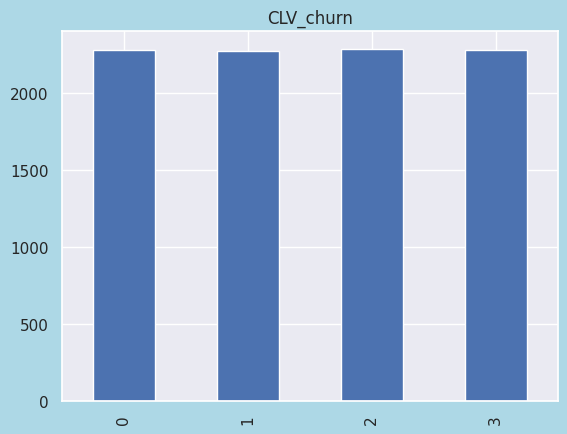

In [ ]:
# Verteilung der ZV anschauen
import matplotlib.pyplot as plt
fig = plt.figure()
df_1['CLV_churn'].value_counts(sort=False).sort_index().plot(kind='bar', title='CLV_churn')

Unser Datensatz ist balanciert / Die Klassen sind ausgewogen , daher betrachten wir im weiteren Verlauf den Wert der Accuracy (vgl. Chicco, Jurman (2020)).

In [ ]:
# kodierte & nicht kodierte Spalten in einem DataFrame:

encoded_columns = list(dummy_liste.columns)
numerical_columns = list(set(df_1_mitdummys.columns) - set(encoded_columns))

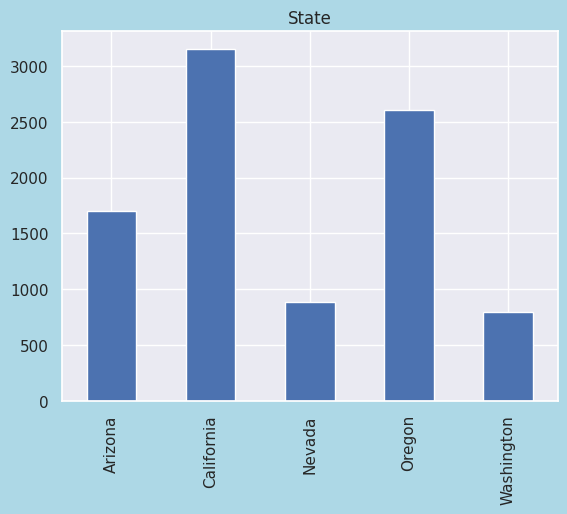

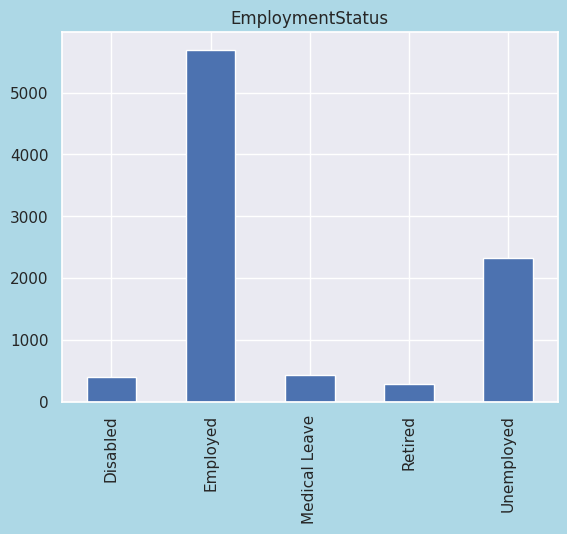

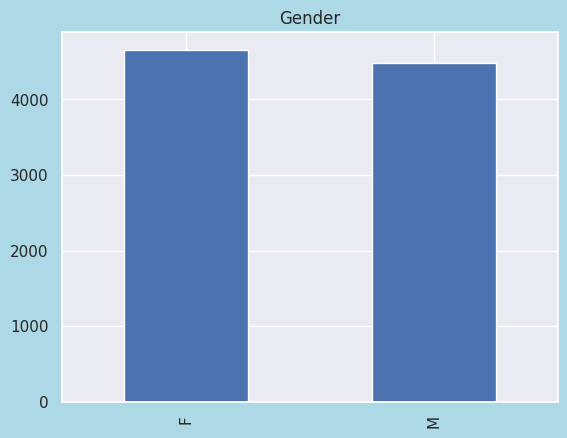

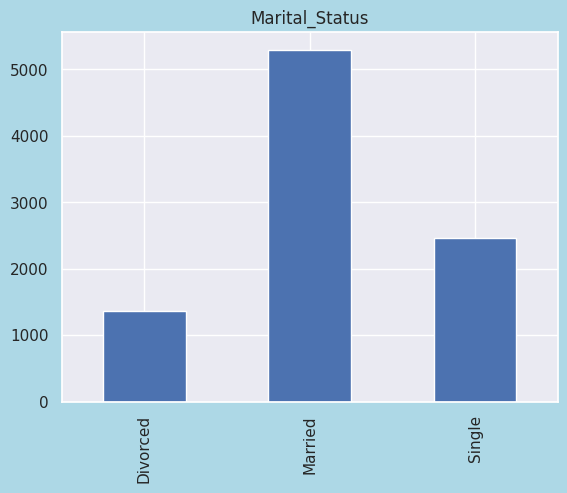

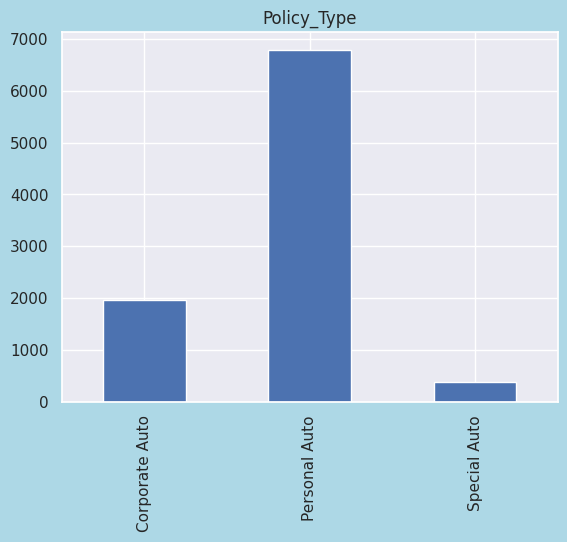

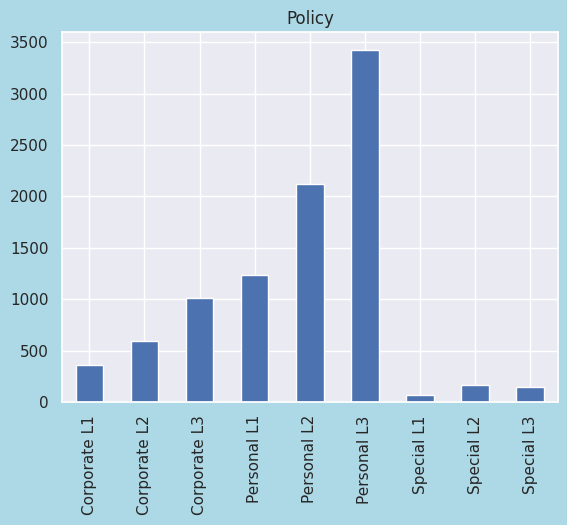

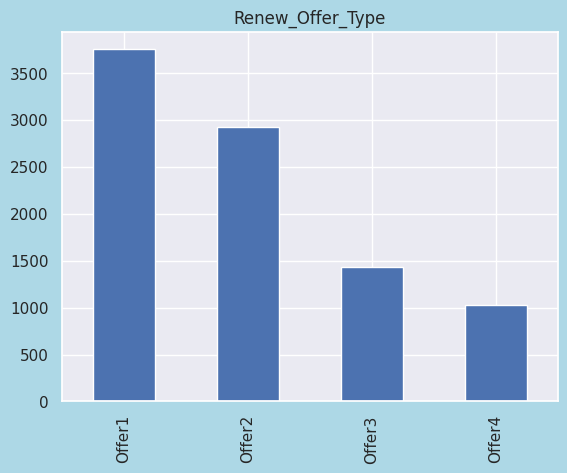

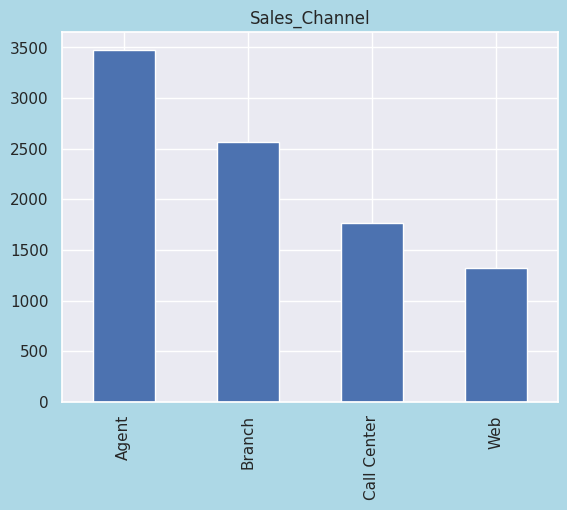

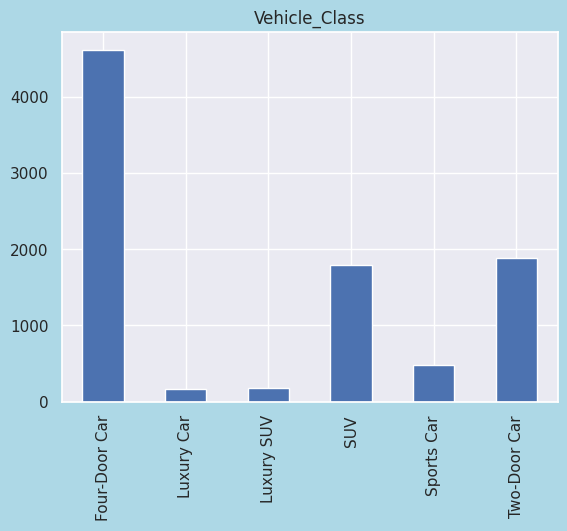

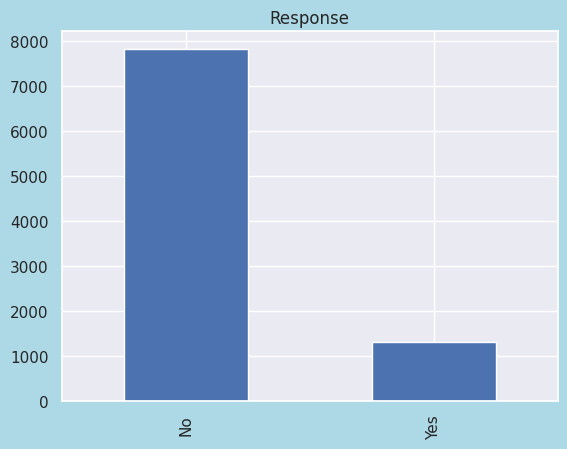

In [ ]:
#plotten
import matplotlib.pyplot as plt
for column in encoded_columns:
    fig = plt.figure()
    dummy_liste[column].value_counts(sort=False).sort_index().plot(kind='bar', title=column)

Wir sehen nun mit wenigen Blicken, dass beispielsweise...
*   ... die meisten Kunden in California oder Oregon angesiedelt sind
*   ... die meisten Kunden berufstätig sind aber auch dass die 2. häufigste Kategorie die der arbeitslosen ist
*   ... das Geschlecht sehr ausgeglichen verteilt ist
*   ... der großteil der Kunden Verheiratet ist, danach folgen Single und Geschieden
*   ... die meisten ein privates Auto besitzen
*   ... der beste Sales Channel über einen Agent ist
*   ... die meisten einen 4-Türer, gefolgt von einem 2-Türer und SUV fahren












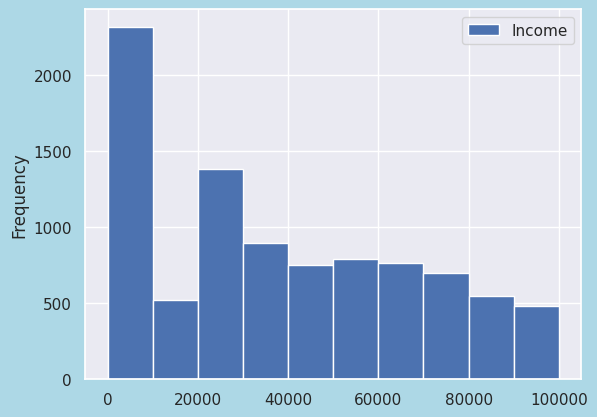

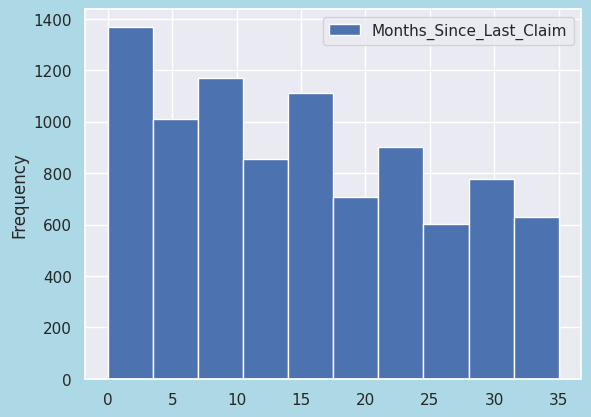

In [ ]:
 #   df_1_mitdummys.plot(kind='hist', y=column)

columns_to_plot = ["Income", "Months_Since_Last_Claim"]

for column in columns_to_plot:
    df_1_mitdummys.plot(kind='hist', y=column)

In [ ]:
df_corr =  df_1_mitdummys.corr('spearman').round(1)

<ipython-input-321-a272f6ecdb0a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


Text(0.5, 1.0, 'Spearman correlation between variables')

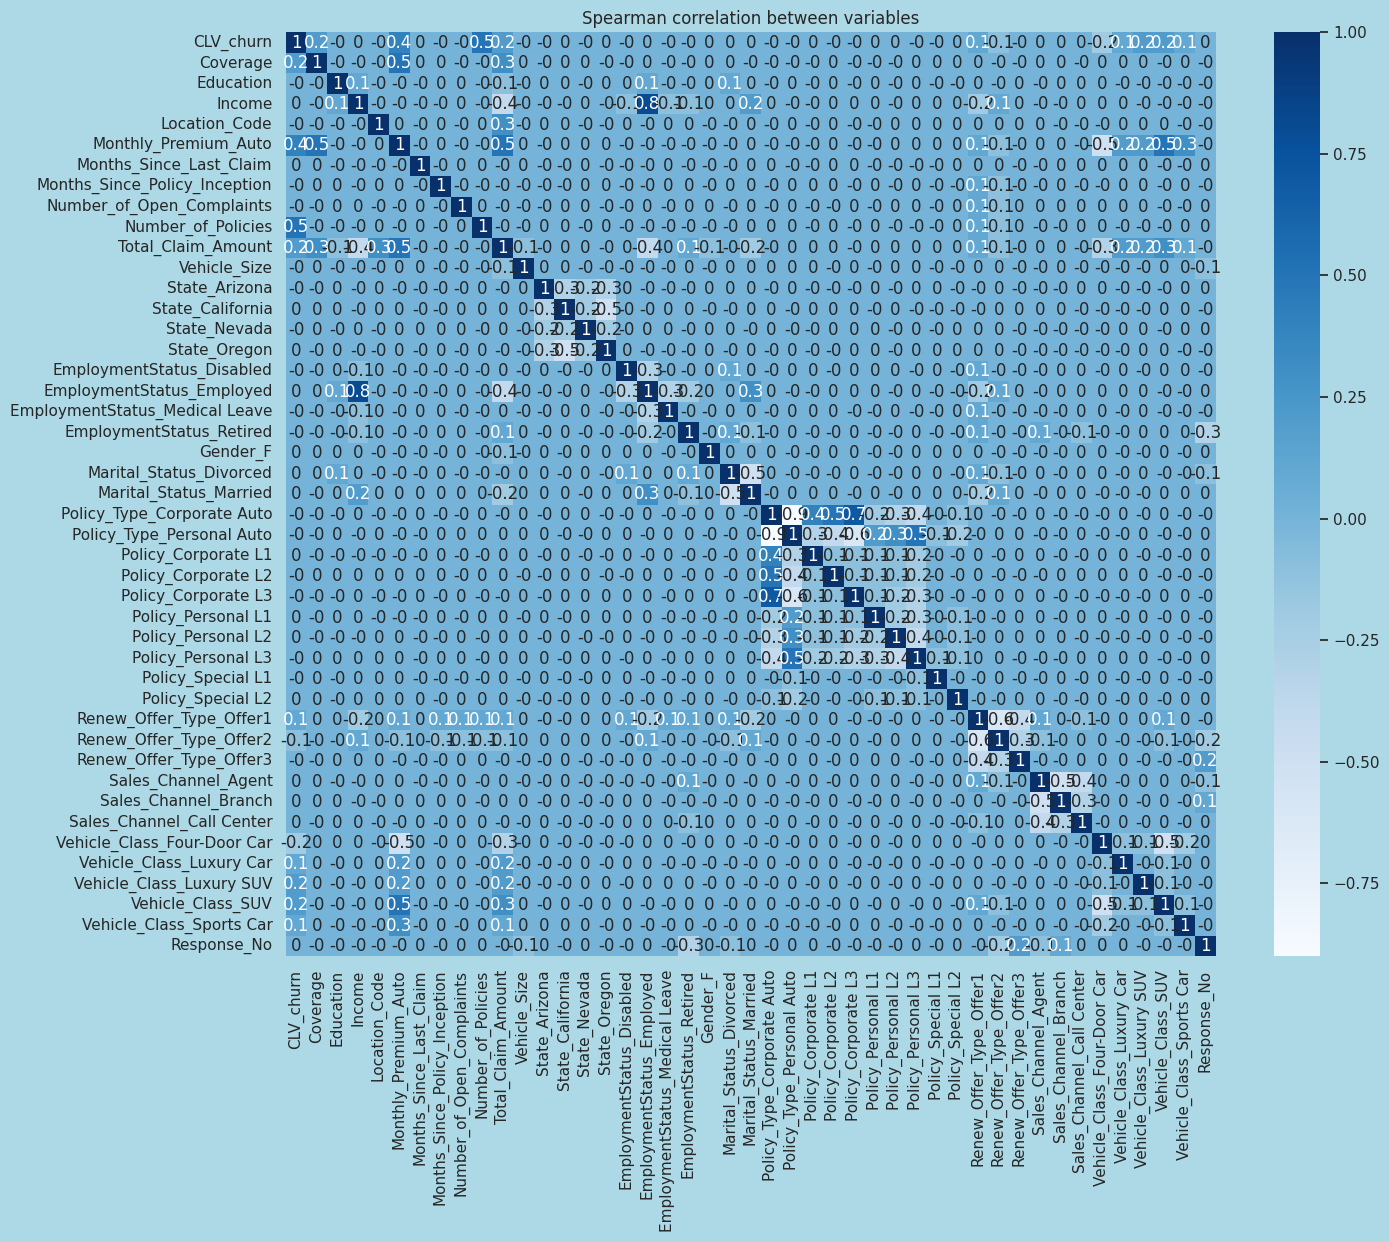

In [ ]:
#Korrelations-Heatmap
import seaborn as sns

plt.figure(figsize=(15, 12))
ax = sns.heatmap(df_corr, annot=True, cmap='Blues')
plt.title("Spearman correlation between variables")

**Interpretation Heatmap:**

Die Heatmap zeigt die Korrelation der Variablen untereinander. Je stärker die Korrelation ist, desto näher liegt der Wert an 1 und desto dunkler ist das Feld eingefärbt.

Bsp.: positive Korrelation (0,5) zwischen Number of Policies und CLV_churn.

Bsp.: negative Korrelation (-0,5) zwischen Monthly Premium Auto und Vehicle Class Four-Door Car.

Die Diagonale beschreibt die Korrelation einer Variable mit sich selbst (1).

##**2. Classification**

**Recap:**

Nun wollen wir die Ist-Situation des Kundenstamms erfassen.

Dafür werden die einzelnen Kunden jeweils auf Basis ihres Customer Lifetime Values in 4 Klassen eingeteilt (sehr abwanderungsgefährdet - gar nicht abwanderungsgefährdet)

Wir vergleichen insgesamt 5 Methoden: KNN, Logistische Regression, Decision Tree, Random Forest sowie XG Boost.

Dabei haben wir immer 3 Varianten je Methode getestet:

*   y skaliert, X unskaliert
*   y unskaliert, X unskaliert
*   y unskaliert & X skaliert ohne Dummies

Am Ende entscheiden wir uns nach dem Hyperparameter-Tuning und der Error Analyse für das Modell mit den besten Werten.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
def evaluate(clf, X_test, y_true): #clf = classifier; X_test = neue Variable
  y_pred = clf.predict(X_test)
  print(classification_report(y_true, y_pred)) #performance von modell evaluieren

###**KNN**

KNN steht für "K-Nearest Neighbors" (k-nächste Nachbarn). Mit der KNN-Methode können wir basierend auf den Trainingsdatenpunkten und ihren zugehörigen Labels neue Datenpunkte klassifizieren oder vorhersagen.

####**y skaliert, X unskaliert - ohne Ergebnis**

In [ ]:
#y skaliert
#from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier()
#X_train, X_test, y_train, y_test = train_test_split(X, y_skaliert, test_size=0.2, random_state=123)

In [ ]:
#knn.fit(X_train, y_train)
# funktioniert nicht, da  trying to apply a classification algorithm or task on a target variable with numeric values instead of discrete labels.

####**y unskaliert, X unskaliert**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
Ergebnisse_KNN_y_unskaliert = evaluate(knn, X_test, y_test) # accuracy=0.46

              precision    recall  f1-score   support

           0       0.44      0.67      0.53       428
           1       0.49      0.47      0.48       458
           2       0.42      0.35      0.38       454
           3       0.52      0.38      0.44       487

    accuracy                           0.46      1827
   macro avg       0.47      0.47      0.46      1827
weighted avg       0.47      0.46      0.46      1827



####**y unskaliert, X skaliert ohne Dummies**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_skaliert_ohneDummies, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
Ergebnisse_KNN_y_unskaliert_X_ohne_Dummies = evaluate(knn, X_test, y_test) #accuracy=0.6

              precision    recall  f1-score   support

           0       0.56      0.81      0.66       428
           1       0.63      0.67      0.65       458
           2       0.56      0.48      0.52       454
           3       0.65      0.45      0.53       487

    accuracy                           0.60      1827
   macro avg       0.60      0.60      0.59      1827
weighted avg       0.60      0.60      0.59      1827



 **Ergebnis:** y unskaliert und X skaliert ohne Dummies ist das beste Vorgehen bei KNN mit einer Accuracy von 0,6.

####**Hyperparameter Tuning**

Wir versuchen die Accuracy des besten Modells zu verbessern.

In [ ]:
# V1
#from sklearn.model_selection import GridSearchCV
#model = knn
#grid_vals = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

#grid_lr = GridSearchCV(estimator=knn, param_grid=grid_vals, scoring='accuracy',
 #                      cv=6, refit=True, return_train_score=True)

#grid_lr.fit(X_train, y_train)
#preds = grid_lr.best_estimator_.predict(X_test)

#grid_lr.best_params_

#evaluate(grid_lr, X_test, y_test) # 0.61 statt 0.6

In [ ]:
# V2
from sklearn.model_selection import GridSearchCV
model = knn
grid_vals = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}
grid_lr = GridSearchCV(estimator=knn, param_grid=grid_vals, scoring='accuracy',
                       cv=6, refit=True, return_train_score=True)
grid_lr.fit(X_train, y_train)
preds = grid_lr.best_estimator_.predict(X_test)

grid_lr.best_params_

evaluate(grid_lr, X_test, y_test) # 0.64 statt 0.6

              precision    recall  f1-score   support

           0       0.65      0.83      0.73       428
           1       0.69      0.67      0.68       458
           2       0.58      0.53      0.56       454
           3       0.64      0.56      0.60       487

    accuracy                           0.64      1827
   macro avg       0.64      0.65      0.64      1827
weighted avg       0.64      0.64      0.64      1827



**Ergebnis:** Das Modell hat sich von 0,6 auf einen Wert von 0,64 verbessert.

####**Error Analysis**

Wir führen eine Error Analysis durch, um die Leistung eines Klassifikationsmodells zu visualisieren und gleichzeitig die Fehler des Modells zu erkennen und zu analysieren, damit wir mögliche  Schwachstellen oder Muster in den Fehlern identifizieren könnnen.

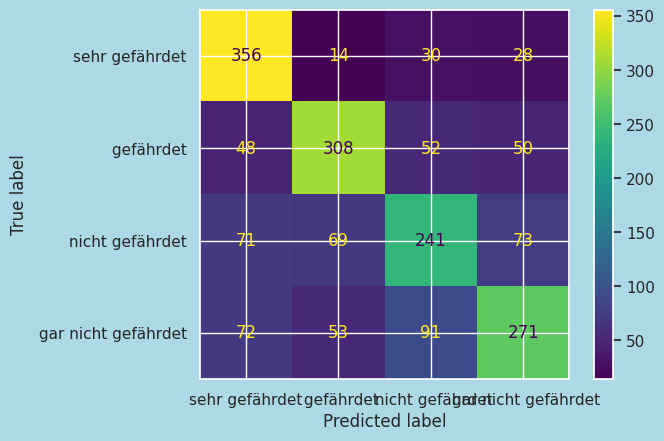

In [ ]:
#KNN
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    grid_lr, X_test, y_test, labels=[0, 1, 2, 3], display_labels=['sehr gefährdet', ' gefährdet', ' nicht gefährdet', ' gar nicht gefährdet'])

**Interpretation der Matrix:**

Die Matrix ist mit unseren 4 Klassen gelabelt und wir können nun erkennen, inwiefern die tatsächliche Abwanderungsgefahr richtig vorhergesagt wurde.
Beispielsweise fallen in die Klasse "sehr gefährtdet" nach dem True Label insgesamt 428 Kunden. Unsere Prediction hat davon 356 richtig vorhergesagt. 14 wurde das Label "gefährdet" zugeordnet, während 58 als (gar) nicht gefährdet einkategorisiert wurden, obwohl diese eigentlich sehr abwanderungsgefährdet sind.

###**Logistische Regression**

Mit der logistischen Regression wird die Vorhersage der Wahrscheinlichkeit (Wert zwischen 0 bis 1), dass eine Instanz einer bestimmten Klasse angehört, ermöglicht.

Nachdem das Modell trainiert wurde, kann es zudem verwendet werden, um Vorhersagen für neue, unbeschriftete Daten zu machen.

####**y skaliert, X unskaliert - ohne Ergebnis**

In [ ]:
#from sklearn.linear_model import LogisticRegression
#logistic = LogisticRegression(random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y_skaliert, test_size=0.2, random_state=123)

In [ ]:
#logistic.fit(X_train, y_train)
#funktioniert nicht, da  trying to apply a classification algorithm or task on a target variable with numeric values instead of discrete labels.

####**y unskaliert, X unskaliert**

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
logistic.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(random_state=42)

In [ ]:
Ergebnisse_log_y_unskaliert = evaluate(logistic, X_test, y_test) #accuracy = 0.61

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       428
           1       0.42      0.52      0.46       458
           2       0.52      0.38      0.44       454
           3       0.57      0.56      0.57       487

    accuracy                           0.61      1827
   macro avg       0.62      0.61      0.61      1827
weighted avg       0.61      0.61      0.60      1827



####**y unskaliert; X skaliert ohne Dummies**

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_skaliert_ohneDummies, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
logistic.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(random_state=42)

In [ ]:
Ergebnisse_log_y_unskaliert_X_ohne_Dummies = evaluate(logistic, X_test, y_test) #accuracy=0.61

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       428
           1       0.42      0.52      0.47       458
           2       0.52      0.38      0.44       454
           3       0.58      0.57      0.58       487

    accuracy                           0.61      1827
   macro avg       0.62      0.62      0.61      1827
weighted avg       0.61      0.61      0.61      1827



 **Ergebnis:** y unskaliert und X skaliert ohne Dummies ist das beste Vorgehen bei der logistischen Regression mit einer Accuracy von 0,61.



####**Hyperparameter Tuning**

Wir versuchen nun, die Accuracy zu verbessern.

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [ ]:
from sklearn.model_selection import GridSearchCV
model = logistic
grid_vals = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
}
grid_lr = GridSearchCV(estimator=logistic, param_grid=grid_vals, scoring='accuracy',
                       cv=6, refit=True, return_train_score=True)
grid_lr.fit(X_train, y_train)
preds = grid_lr.best_estimator_.predict(X_test)

grid_lr.best_params_

evaluate(grid_lr, X_test, y_test) # 0.62 statt 0.61

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
/usr/local/lib/python3.10/dist-packages/sklearn/line

              precision    recall  f1-score   support

           0       0.66      0.96      0.78       428
           1       0.64      0.55      0.59       458
           2       0.60      0.37      0.46       454
           3       0.57      0.61      0.59       487

    accuracy                           0.62      1827
   macro avg       0.62      0.62      0.61      1827
weighted avg       0.61      0.62      0.60      1827



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/

**Ergebnis:** Das Hyperparameter Tuning hat die Accuracy von 0,61 auf 0,62 verbessert.




####**Error Analysis**

Wir führen eine Error Analysis durch, um die Leistung eines Klassifikationsmodells zu visualisieren und gleichzeitig die Fehler des Modells zu erkennen und zu analysieren, damit wir mögliche  Schwachstellen oder Muster in den Fehlern identifizieren könnnen.





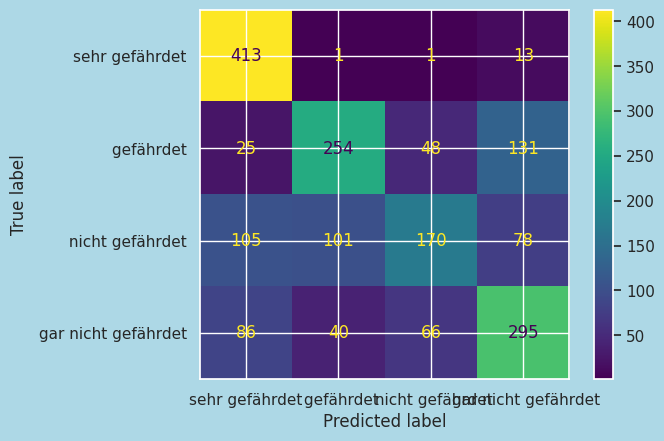

In [ ]:
#Logistische Regression
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    grid_lr, X_test, y_test, labels=[0, 1, 2, 3], display_labels=['sehr gefährdet', ' gefährdet', ' nicht gefährdet', ' gar nicht gefährdet'])

**Interpretation der Matrix:**

Die Matrix ist mit unseren 4 Klassen gelabelt und wir können nun erkennen, inwiefern die tatsächliche Abwanderungsgefahr richtig vorhergesagt wurde.

Bsp.: Von den tatsächlich 454 nicht gefährdeten wurden lediglich 170 auch in diese Kategorie predicted. 206 Kunden wurde eine höhere Gefährdung zugeschrieben, 78 eine noch geringere.

###**Decision Tree**


 Innerhalb einer Klassifikation ermöglicht ein Decision Tree die Vorhersage der Klasse eines Datenpunkts basierend auf den Werten seiner Merkmale. Das Ziel besteht also darin, die Daten anhand dieser Merkmale in möglichst homogene Klassen zu unterteilen.

Jeder innere Knoten des Baumes stellt dabei eine Entscheidung und jeder Blattknoten eine Klassenzuordnung dar.


####**y skaliert, X unskaliert - ohne Ergebnis**

In [ ]:
#from sklearn.tree import DecisionTreeClassifier
#tree = DecisionTreeClassifier(random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y_skaliert, test_size=0.2, random_state=123)

In [ ]:
#tree.fit(X_train, y_train)
#funktioniert nicht, da  trying to apply a classification algorithm or task on a target variable with numeric values instead of discrete labels.

####**y unskaliert, X unskaliert**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
Ergebnisse_tree_y_unskaliert = evaluate(tree, X_test, y_test) #accuracy=0.92

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       428
           1       0.95      0.97      0.96       458
           2       0.84      0.88      0.86       454
           3       0.90      0.86      0.88       487

    accuracy                           0.92      1827
   macro avg       0.92      0.92      0.92      1827
weighted avg       0.92      0.92      0.92      1827



####**y unskaliert; X skaliert ohne Dummies**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_skaliert_ohneDummies, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
Ergebnisse_tree_y_unskaliert_X_ohne_Dummies = evaluate(tree, X_test, y_test) #accuracy=0.92

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       428
           1       0.95      0.97      0.96       458
           2       0.84      0.88      0.86       454
           3       0.90      0.86      0.88       487

    accuracy                           0.92      1827
   macro avg       0.92      0.92      0.92      1827
weighted avg       0.92      0.92      0.92      1827



 **Ergebnis:** y unskaliert und X skaliert ohne Dummies ist das beste Vorgehen beim Decision Tree mit einer Accuracy von 0,92.



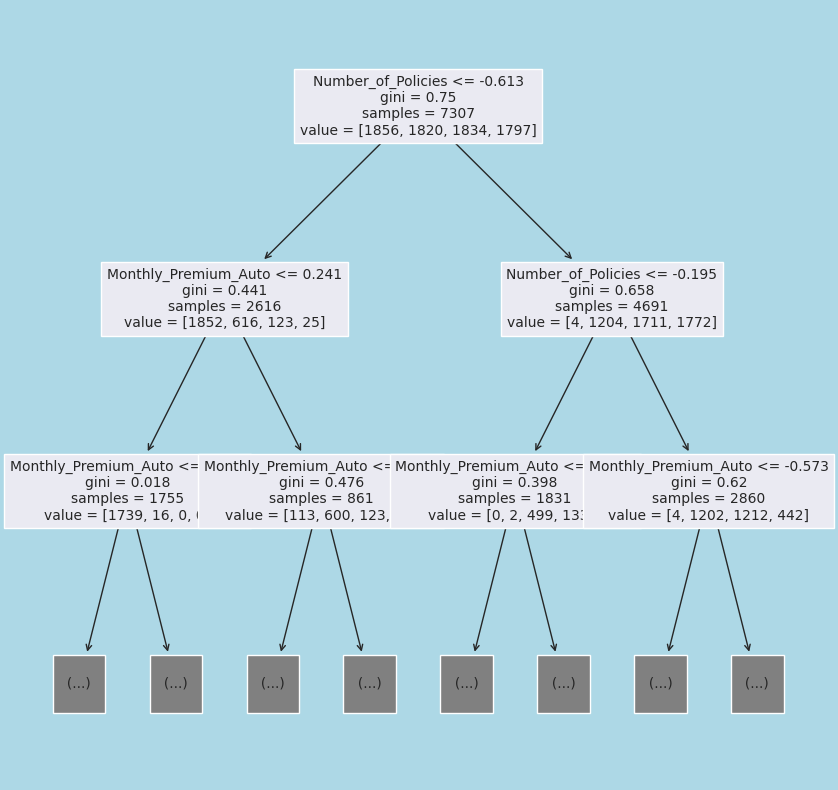

In [ ]:
from sklearn import tree as sktree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

sktree.plot_tree(tree, max_depth=2, fontsize=10, feature_names=X_skaliert_ohneDummies.columns);

**Interpretation:**

Der oberste Knoten des Baumes "Number of Policies" ist der Wurzelknoten und stellt die oberste Entscheidungsregel dar. Diese kann entweder wahr oder falsch sein (binäre Verzweigung).
Trifft die Entscheidungsregel zu, wird als nächstes der linke Ast hin zu Monthly Premium Auto gewählt, ansonsten wird der rechte Ast gewählt.

Insgesamt können die Variablen identifiziert werden, die den  größten Einfluss auf unsere Zeilvariable und die Classification haben.






####**Hyperparameter Tuning**

Wir versuchen nun, die Accuracy zu verbessern.

In [ ]:
# V1
#from sklearn.model_selection import GridSearchCV
#model = tree
#grid_vals = {
#    'criterion': ['gini', 'entropy'],
#    'max_depth': [None, 5, 10, 20],
#}

#grid_lr = GridSearchCV(estimator=tree, param_grid=grid_vals, scoring='accuracy',
#                       cv=6, refit=True, return_train_score=True)

#grid_lr.fit(X_train, y_train)
#preds = grid_lr.best_estimator_.predict(X_test)

#grid_lr.best_params_

#evaluate(grid_lr, X_test, y_test) # 0.92 statt 0.92

In [ ]:
# V2
#from sklearn.model_selection import GridSearchCV
#model = tree
#grid_vals = {
#    'criterion': ['gini', 'entropy'],
#    'max_depth': [None, 5, 10, 20],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 5],
#}

#grid_lr = GridSearchCV(estimator=tree, param_grid=grid_vals, scoring='accuracy',
#                       cv=6, refit=True, return_train_score=True)

#grid_lr.fit(X_train, y_train)
#preds = grid_lr.best_estimator_.predict(X_test)

#grid_lr.best_params_

#evaluate(grid_lr, X_test, y_test) # 0.93 statt 0.92

In [ ]:
# V3
from sklearn.model_selection import GridSearchCV
model = tree
grid_vals = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2']
}

grid_lr = GridSearchCV(estimator=tree, param_grid=grid_vals, scoring='accuracy',
                       cv=6, refit=True, return_train_score=True)

grid_lr.fit(X_train, y_train)
preds = grid_lr.best_estimator_.predict(X_test)

grid_lr.best_params_

evaluate(grid_lr, X_test, y_test) # 0.93 statt 0.92

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       428
           1       0.97      0.98      0.97       458
           2       0.82      0.94      0.88       454
           3       0.95      0.81      0.88       487

    accuracy                           0.93      1827
   macro avg       0.93      0.93      0.93      1827
weighted avg       0.93      0.93      0.93      1827



**Ergebnis:** Das Hyperparameter Tuning hat die Accuracy von 0,92 auf 0,93 verbessert.




####**Error Analysis**

Wir führen eine Error Analysis durch, um die Leistung eines Klassifikationsmodells zu visualisieren und gleichzeitig die Fehler des Modells zu erkennen und zu analysieren, damit wir mögliche  Schwachstellen oder Muster in den Fehlern identifizieren könnnen.





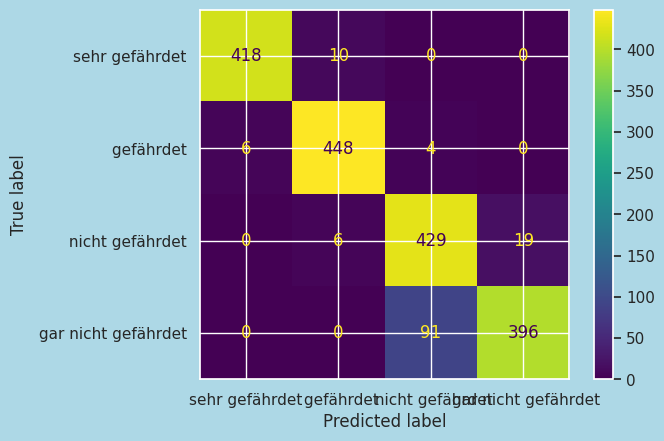

In [ ]:
#Decision Tree
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    grid_lr, X_test, y_test, labels=[0, 1, 2, 3], display_labels=['sehr gefährdet', ' gefährdet', ' nicht gefährdet', ' gar nicht gefährdet'])

Die Confusion Matrix zeigt erneut, wie viele Kunden durch die Prediction den richtigen Klassen zugeorndet werden und an welchen Stellen es Abweichungen gibt.

###**Random Forest**

Die Methode hat für uns den Vorteil, dass sie eine hohe Vorhersagegenauigkeit hat, da sie mehrere Entscheidungsbäume kombiniert.
Zudem wird Overfitting reduziert, da zufällige Stichproben und zufällige Merkmale verwendet werden.

Für die Optimierung bietet sie letztendlich den Vorteil, dass sie durch viele Hyperparameter angepasst werden kann, um die Modellleistung zu optimieren.

####**y skaliert, X unskaliert - ohne Ergebnis**

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#random_forest = RandomForestClassifier(random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y_skaliert, test_size=0.2, random_state=123)

In [ ]:
#random_forest.fit(X_train, y_train)
#funktioniert nicht, da  trying to apply a classification algorithm or task on a target variable with numeric values instead of discrete labels.

####**y unskaliert, X unskaliert**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
random_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
Ergebnisse_forest_y_unskaliert = evaluate(random_forest, X_test, y_test) #accuracy=0.93

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       428
           1       0.95      0.97      0.96       458
           2       0.85      0.90      0.87       454
           3       0.93      0.87      0.90       487

    accuracy                           0.93      1827
   macro avg       0.93      0.93      0.93      1827
weighted avg       0.93      0.93      0.93      1827



####**y unskaliert, X skaliert ohne Dummies**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_skaliert_ohneDummies, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
Ergebnisse_forest_y_unskaliert_X_ohne_Dummies = evaluate(random_forest, X_test, y_test) #accuracy=0.93

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       428
           1       0.95      0.97      0.96       458
           2       0.85      0.90      0.87       454
           3       0.93      0.87      0.90       487

    accuracy                           0.93      1827
   macro avg       0.93      0.93      0.93      1827
weighted avg       0.93      0.93      0.93      1827



 **Ergebnis:** y unskaliert und X skaliert ohne Dummies ist das beste Vorgehen beim Random Forest mit einer Accuracy von 0,93.



####**Hyperparameter Tuning**

Wir versuchen nun, die Accuracy zu verbessern.

In [ ]:
# V1
#from sklearn.model_selection import GridSearchCV
#model = random_forest
#grid_vals = {
#    'criterion': ['gini', 'entropy'],
#    'max_depth': [None, 5, 10, 20],
#}

#grid_lr = GridSearchCV(estimator=random_forest, param_grid=grid_vals, scoring='accuracy',
#                       cv=6, refit=True, return_train_score=True)

#grid_lr.fit(X_train, y_train)
#preds = grid_lr.best_estimator_.predict(X_test)

#grid_lr.best_params_

#evaluate(grid_lr, X_test, y_test) # 0.93 statt 0.93

In [ ]:
# V2
from sklearn.model_selection import GridSearchCV
model = random_forest
grid_vals = {
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
}

grid_lr = GridSearchCV(estimator=random_forest, param_grid=grid_vals, scoring='accuracy',
                       cv=6, refit=True, return_train_score=True)

grid_lr.fit(X_train, y_train)
preds = grid_lr.best_estimator_.predict(X_test)

grid_lr.best_params_

evaluate(grid_lr, X_test, y_test) # 0.93 statt 0.93

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       428
           1       0.95      0.97      0.96       458
           2       0.84      0.91      0.88       454
           3       0.94      0.86      0.90       487

    accuracy                           0.93      1827
   macro avg       0.93      0.93      0.93      1827
weighted avg       0.93      0.93      0.93      1827



Der Wert der Accuracy konnte durch das Tuning nicht verbessert werden.

####**Error Analysis**

Wir führen eine Error Analysis durch, um die Leistung eines Klassifikationsmodells zu visualisieren und gleichzeitig die Fehler des Modells zu erkennen und zu analysieren, damit wir mögliche  Schwachstellen oder Muster in den Fehlern identifizieren könnnen.





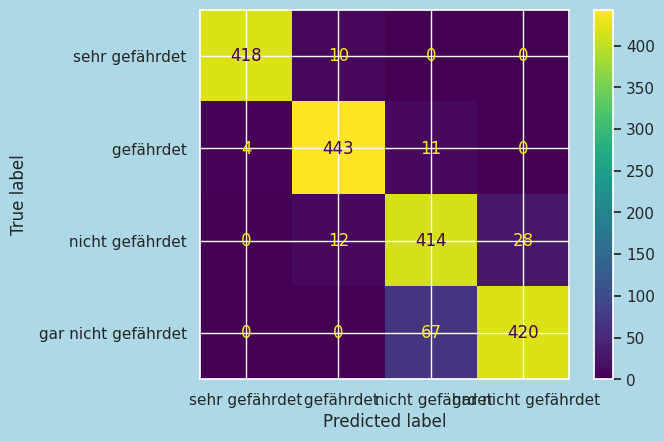

In [ ]:
#Random Forest
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    grid_lr, X_test, y_test, labels=[0, 1, 2, 3], display_labels=['sehr gefährdet', ' gefährdet', ' nicht gefährdet', ' gar nicht gefährdet'])

Die Matrix zeigt auch bei diesem Modell, dass der Großteil der Kunden mit dem richtigen Label predicted wurde und der richtigen Klasse angehört.

###**XG Boost**

Die XGBoost-Methode kann wie auch die anderen Methodsen für Klassifikationsprobleme eingesetzt werden.

Die Vorteile dieser Methode sind beispielsweise, dass die Vorhersagegenauigkeit serh hoch sind. Durch die verschiedenen Hyperparameter, die reguliert werden können, kann Overfitting reguliert werden.


####**y skaliert, X unskaliert - ohne Ergebnis**

In [ ]:
#from sklearn.ensemble import GradientBoostingClassifier
#xgb = GradientBoostingClassifier()
#X_train, X_test, y_train, y_test = train_test_split(X, y_skaliert, test_size=0.2, random_state=123)

In [ ]:
#xgb.fit(X_train, y_train)
#funktioniert nicht, da  trying to apply a classification algorithm or task on a target variable with numeric values instead of discrete labels.

####**y unskaliert, X unskaliert**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
xgb = GradientBoostingClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
xgb.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
Ergebnisse_xg_y_unskaliert = evaluate(xgb, X_test, y_test) #accuracy=0.93

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       428
           1       0.97      0.97      0.97       458
           2       0.84      0.94      0.89       454
           3       0.95      0.85      0.90       487

    accuracy                           0.93      1827
   macro avg       0.94      0.94      0.94      1827
weighted avg       0.94      0.93      0.94      1827



####**y unskaliert, X skaliert ohne Dummies**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
xgb = GradientBoostingClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_skaliert_ohneDummies, y_unskaliert, test_size=0.2, random_state=123)

In [ ]:
xgb.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
Ergebnisse_xg_y_unskaliert_X_ohne_Dummies = evaluate(xgb, X_test, y_test) #accuracy=0.93

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       428
           1       0.97      0.97      0.97       458
           2       0.84      0.94      0.89       454
           3       0.95      0.85      0.90       487

    accuracy                           0.93      1827
   macro avg       0.94      0.94      0.94      1827
weighted avg       0.94      0.93      0.94      1827



 **Ergebnis:** y unskaliert und X skaliert ohne Dummies ist das beste Vorgehen bei XG Boost mit einer Accuracy von 0,93.



####**Hyperparameter Tuning**

Wir versuchen nun, die Accuracy zu verbessern.

In [ ]:
# V1
#from sklearn.model_selection import GridSearchCV
#model = xgb
#grid_vals = {
#    'verbose': [0],
#    'warm_start': [False]
#}

#grid_lr = GridSearchCV(estimator=xgb, param_grid=grid_vals, scoring='accuracy',
#                       cv=6, refit=True, return_train_score=True)

#grid_lr.fit(X_train, y_train)
#preds = grid_lr.best_estimator_.predict(X_test)

#grid_lr.best_params_

#evaluate(grid_lr, X_test, y_test) # 0.93 statt 0.93

In [ ]:
# V2
#from sklearn.model_selection import GridSearchCV
#model = xgb
#grid_vals = {
#    'max_features': ['auto', 'sqrt', 'log2'],
#    'max_leaf_nodes': [None],
#}

#grid_lr = GridSearchCV(estimator=xgb, param_grid=grid_vals, scoring='accuracy',
#                       cv=6, refit=True, return_train_score=True)

#grid_lr.fit(X_train, y_train)
#preds = grid_lr.best_estimator_.predict(X_test)

#grid_lr.best_params_

#evaluate(grid_lr, X_test, y_test) # 0.93 statt 0.93

In [ ]:
# V3
from sklearn.model_selection import GridSearchCV
model = xgb
grid_vals = {
    'max_depth': [3, 5, 7],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
}

grid_lr = GridSearchCV(estimator=xgb, param_grid=grid_vals, scoring='accuracy',
                       cv=6, refit=True, return_train_score=True)

grid_lr.fit(X_train, y_train)
preds = grid_lr.best_estimator_.predict(X_test)

grid_lr.best_params_

evaluate(grid_lr, X_test, y_test) # 0.93 statt 0.93

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
/usr/local/lib/python3.10/dis

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       428
           1       0.97      0.97      0.97       458
           2       0.85      0.93      0.89       454
           3       0.95      0.87      0.91       487

    accuracy                           0.94      1827
   macro avg       0.94      0.94      0.94      1827
weighted avg       0.94      0.94      0.94      1827



Der Wert der Accuracy konnte durch das Tuning nicht verbessert werden.

####**Error Analysis**

Wir führen eine Error Analysis durch, um die Leistung eines Klassifikationsmodells zu visualisieren und gleichzeitig die Fehler des Modells zu erkennen und zu analysieren, damit wir mögliche  Schwachstellen oder Muster in den Fehlern identifizieren könnnen.


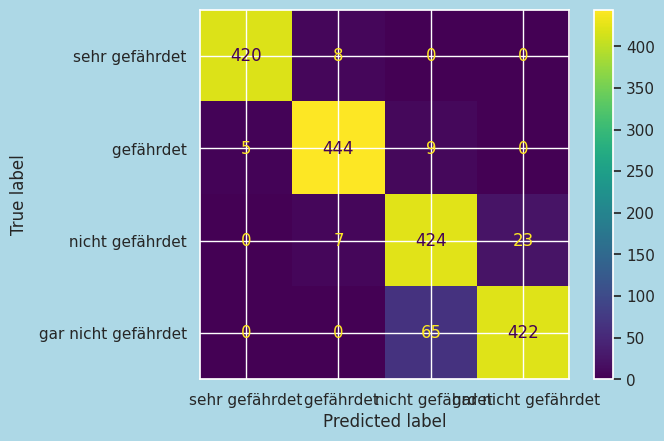

In [ ]:
#XG Boost
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
   grid_lr, X_test, y_test, labels=[0, 1, 2, 3], display_labels=['sehr gefährdet', ' gefährdet', ' nicht gefährdet', ' gar nicht gefährdet'])

Die Matrix zeigt auch bei diesem Modell, dass der Großteil der Kunden mit dem richtigen Label predicted wurde und der richtigen Klasse angehört.

### Visualisierung der besten Methode

Aus dem Vergleich der 5 Methoden geht hervor, dass XG Boost mit einer Accuracy von 0,93 die beste ist. Zusätzlich lässt sich aus der Matrix ablesen, dass XG Boost die (sehr) abwanderungsgefährdeten Kunden am besten identifiziert und somit das Ziel unseres Projektes erfüllt.

 Aus diesem Grund betrachten wir die Performance dieser Methode nun genauer:

In [ ]:
#Visualisierung - Precision Recall Curve.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

In [ ]:
y_test_bin = label_binarize(y_test.values, classes=np.unique(y_test.values))

y_probs = grid_lr.predict_proba(X_test)

classes = np.unique(y_test.values)

precision = dict()
recall = dict()
avg_precision = dict()
for i in range(len(classes)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_probs[:, i])
    avg_precision[i] = average_precision_score(y_test_bin[:, i], y_probs[:, i])

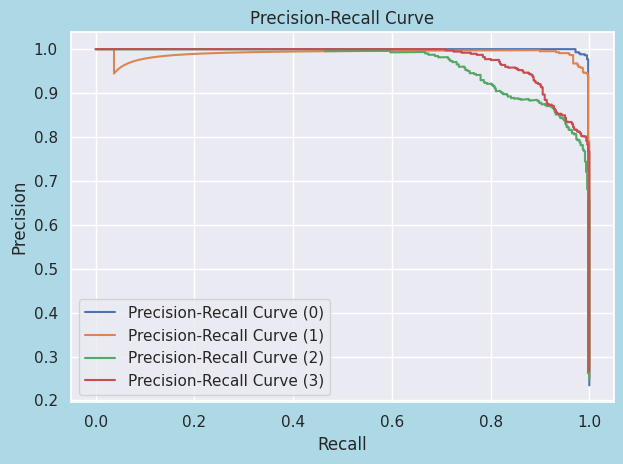

In [ ]:
#plotten
plt.figure()
for i in range(len(classes)):
    plt.plot(recall[i], precision[i], label='Precision-Recall Curve ({})'.format(classes[i]))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

Die Precision-Recall-Kurve wird verwendet, um zu beurteilen, wie gut ein Klassifikator in der Lage ist, positive Beispiele von negativen Beispielen zu unterscheiden.

Die Linie im Diagramm verbindet Punkte, die die Precision-Werte und die Recall-Werte abbilden.

Zudem zeigt es den Trade-off zwischen Präzision und Wiederfindungsrate. Ein idealer Klassifikator würde eine Precision von 1 und einen Recall von 1 haben, was einer Position in der oberen rechten Ecke des Diagramms entspricht.

Wir sehen, dass unsere Kurven der 4 gebildeten Klassen recht nah im oberen rechten Eck angesiedelt sind. Besonders die Klasse der (stark) gefährdeten haben sehr gute Werte.

In [ ]:
#Visualisierung ROC Kurve

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

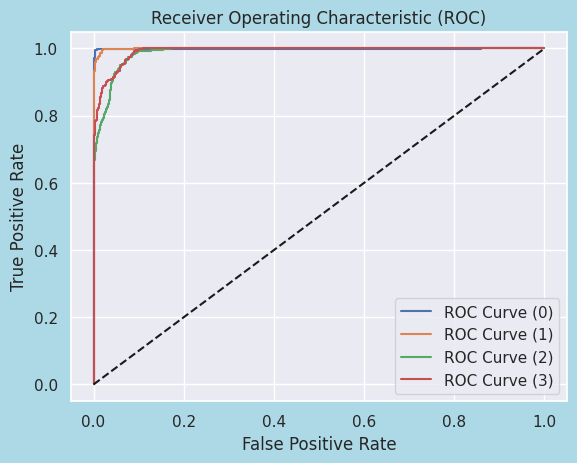

In [ ]:
#plotten
plt.figure()
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label='ROC Curve ({})'.format(classes[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()

**Interpretation:**

Die optimale Leistung wird erreicht, wennn sich die ROC_Kurven der oberen linken Ecke nähern und somit die Fläche unterhalb der Kurven so groß wie möglich wird. Die Leistung unseres Modells ist daher sehr hoch.

Die diagonale Referenzlinie repräsentiert die Leistung eines zufälligen Klassifikators. Da sich unsere Kurven nicht in der Nähe dieser Geraden befinden, ist unsere Vorhersagekraft wesentlich besser als ein zufälliges Raten.


###Ergebnis der Classification

Die nachfolgende Tabelle fasst die Accuracy-Werte der besten Versuche der 5 getesteten Modelle jeweils vor und nach dem Hyperparameter-Tuning zusammen.

Die Modelle Decision Tree, Random Forest und XG Boost haben zwar jeweils eine Accuracy von 0,93 (nach Tuning), doch aufgrund der Matrix innerhalb der Error Analysis stellt XG Boost das Modell mit der höchsten Vorhersagegenauigkeit der (sehr) abwanderungsgefährdeten Kunden dar.

In [ ]:
data = [
    ["KNN", "0.6", "0.64"],
    ["logistische Regression", "0.61", "0.62"],
    ["Decision Tree", "0.92", "0.93"],
    ["Random Forest", "0.93", "0.93"],
    ["XG Boost", "0.93", "0.93"]
]

headers = ["Methode", "vor Tuning", "nach Tuning"]

table = tabulate(data, headers, tablefmt="pipe")

In [ ]:
print(table)

| Methode                |   vor Tuning |   nach Tuning |
|:-----------------------|-------------:|--------------:|
| KNN                    |         0.6  |          0.64 |
| logistische Regression |         0.61 |          0.62 |
| Decision Tree          |         0.92 |          0.93 |
| Random Forest          |         0.93 |          0.93 |
| XG Boost               |         0.93 |          0.93 |


##**3. Multiple Lineare Regression**

**Ziel**:
In diesem Kapitel möchten wir das Unternehmen handlungsfähig machen mit einem vorausschauenden Blick auf die Vorhersage des Customer Lifetime Values für die Kunden in der Zukunft.
Hierzu verwenden wir die multiple lineare Regression.

Wir vergleichen insgesamt 4 Methoden (inklusive Dummy Regressor) basierend auf der erzielten Vorhersagewahrscheinlichkeit: Lineare Regression (Ordinary Least Squares & Ridge Regression), Decision Tree und Gradient Boosting.

Dabei haben wir immer 2 Varianten je Methode getestet:

- y unskaliert, X unskaliert
- y unskaliert, X skaliert

Der besseren Variante wird pro Methode ein Hyperparameter-Tuning unterzogen.
Die Methode mit dem besten R^2 Wert (und Bias sowie Variance) unterziehen wir eine Error Analyse und einer Visualierung.

In [ ]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [ ]:
# Alle X skaliert, außer Dummies + y unskaliert
X = X_skaliert_ohneDummies
y = target_regression

In [ ]:
# Alle X unskaliert + y unskaliert
#X = columns_to_scale_2
#y = target_regression

In [ ]:
# Train-Test-Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
def evaluate(reg, X_test, y_test):
    pred = reg.predict(X_test)
    r2 = r2_score(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    rmse = mean_squared_error(y_test, pred, squared=False)
    mape = mean_absolute_percentage_error(y_test, pred)

    # Berechnung des Bias
    pred_train = reg.predict(X_train)
    pred_test = reg.predict(X_test)
    mae_train = mean_absolute_error(y_train, pred_train)
    mae_test = mean_absolute_error(y_test, pred_test)
    bias = mae_train - mae_test

    # Berechnung der Varianz
    mse_train = mean_squared_error(y_train, pred_train)
    mse_test = mean_squared_error(y_test, pred_test)
    variance = mse_test - mae_test**2

    print('R2:', r2)
    print('MAE:', round(mae, 3))
    print('MSE:', round(mse, 3))
    print('RMSE:', round(rmse, 3))
    print('MAPE:', round(mape, 3))
    print('Bias:', round(bias, 3))
    print('Varianz:', round(variance, 3))

####**Dummy Regressor**

Bei diesem Modell wird stets der Mittelwert der Zielvariable (Customer Lifetime Value) geschätzt.

Das Modell dient als Basis zum Vergleich der Performance der nachfolgenden Modelle.

In [ ]:
from sklearn.dummy import DummyRegressor
dummy = DummyRegressor()
dummy.fit(X_train, y_train)
evaluate(dummy, X_test, y_test)

R2: -0.00015451008198086313
MAE: 4567.872
MSE: 51544108.326
RMSE: 7179.423
MAPE: 0.795
Bias: -160.586
Varianz: 30678652.233


| Metrik | Beschreibung |
|--------|-------------|
| R2 | R-Quadrat, auch bekannt als Bestimmtheitskoeffizient, misst den Anteil der Varianz in der abhängigen Variable, der durch die unabhängigen Variablen vorhersagbar ist. Es ist ein Wert zwischen 0 und 1, wobei 1 eine perfekte Anpassung angibt. |
| MAE | Mean Absolute Error misst den durchschnittlichen absoluten Unterschied zwischen den vorhergesagten und tatsächlichen Werten. Es gibt eine Vorstellung davon, wie weit die Vorhersagen von den tatsächlichen Werten entfernt sind. |
| MSE | Mean Squared Error misst den Durchschnitt der quadrierten Unterschiede zwischen den vorhergesagten und tatsächlichen Werten. Es ist nützlich, um große Fehler zu bestrafen, weshalb es eine gute Metrik für Modelle mit Ausreißern ist. |
| RMSE | Root Mean Squared Error ist die Quadratwurzel des MSE. Es misst die durchschnittliche Größe der Fehler in denselben Einheiten wie die ursprüngliche Variable.|
| MAPE | Mean Absolute Percentage Error misst die durchschnittliche prozentuale Differenz zwischen den vorhergesagten und tatsächlichen Werten. Es ist eine gute Metrik zur Bewertung der Leistung von Modellen mit unterschiedlichen Datenskalen. |

| Weitere Metriken |
|--------|
| **Bias** |
Der Bias eines Modells gibt an, wie stark die Vorhersagen im Durchschnitt von den tatsächlichen Werten abweichen.
*Hoher Bias:* Das Modell ist zu stark vereinfacht und erfasst nicht alle relevanten Muster und Zusammenhänge in den Daten.
*Niedriger Bias*: Das Modell passt gut zu den Daten und erfasst die zugrunde liegenden Beziehungen angemessen. |
| **Varianz** |
 Die Varianz eines Modells gibt an, wie stark die Vorhersagen von einem Trainingsdatensatz zu einem anderen variieren.
 *Hohe Varianz:* Das Modell ist überanpassungsfähig (Overfitting) und passt sich zu stark den spezifischen Trainingsdaten an. Es kann schlecht auf neue Daten generalisieren.
*Niedrige Varianz:* Das Modell ist stabil und liefert konsistente Vorhersagen, unabhängig vom Trainingsdatensatz.|

**Ergebnis R^2**: Der R2-Wert des Dummy Regressors ist mit -0,00015 sehr schlecht. Das skalierte und unskalierte X kommen zum gleichen Ergebnis. Das Modell hat bisher keine Vorhersagekraft und kann die abhängigen Variablen nicht durch die unabhängige Zielvariable vorhersagen.







**Ergebnis Bias & Varianz**: Der Bias beträgt -160.59, weswegen das Modell dazu neigt, den Customer Lifetime Value der Kunden zu unterschätzen.
Die Varianz beträgt 30678652,233, weswegen die Vorhersagen des Modells sehr stark streuen und es relativ viele unterschiedlichen Vorhersagen gibt. Dies könnte auf eine hohe Komplexität und Overfitting des Modells hindeuten.

###**Lineare Regression**

Die erste zu testende Methode ist die lineare Regression.
Hier testen wir:


**Ordinary Least Squares (OLS):**


OLS minimiert die Summe der quadrierten Abweichungen zwischen beobachteten und vorhersagten Werten für die Schätzung der Regressionskoeffizienten.

**Ridge Regression:**

OLS wird durch die Ridge Regression als Regularisierungstechnik erweitert. Diese Methode dient zur Modellstabilitätsverbesserung indem die Multikollinearität umgeht wird für die Koeffizientenschätzung.


####**Ordinary Least Squares**

In [ ]:
# Alle X skaliert, außer Dummies + y unskaliert
X = X_skaliert_ohneDummies
y = target_regression

In [ ]:
# Alle X unskaliert + y unskaliert
#X = columns_to_scale_2
#y = target_regression

In [ ]:
# Train-Test-Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.pipeline import make_pipeline
linear_scaled = make_pipeline(scaler, linear)
linear_scaled.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Berechnung des Bias
pred_train = linear_scaled.predict(X_train)
pred_test = linear_scaled.predict(X_test)
mae_train = mean_absolute_error(y_train, pred_train)
mae_test = mean_absolute_error(y_test, pred_test)
bias = mae_train - mae_test

# Berechnung der Varianz
mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
variance = mse_test - mae_test**2

evaluate(linear_scaled, X_test, y_test)


R2: 0.15883081367793606
MAE: 3975.499
MSE: 43350617.553
RMSE: 6584.119
MAPE: 0.613
Bias: -131.913
Varianz: 27546027.922


**Ergebnis R^2**: Im Falle der Ordinary Least Squares hat das skalierte X besser performt (R^2 = 0,159) als das unskalierte X (R^2 = 0,152).
Allgemein ist die Regression jedoch noch relativ schlecht in der Vorhersage und erklärt nur 15,9% der Varianz in den beobachteten CLV-Daten.

Dennoch performt unsere lineare Regression deutlich besser als der Dummy Regressor, welchen wir vorher getestet haben. Wir sind von einem R^2 von - 0,00015 auf 0,159 gestiegen insgesamt.


**Ergebnis Bias & Varianz**: Der Bias beträgt -131.913, weswegen das Modell dazu neigt, den Customer Lifetime Value der Kunden zu unterschätzen. Die Varianz beträgt 27546027.922, weswegen die Vorhersagen des Modells sehr stark streuen und relativ viele unterschiedliche Vorhersagen gibt. Dies könnte auf eine hohe Komplexität und Overfitting des Modells deuten.

Dennoch performt OLS auch in diesen Werten besser als der Dummy Regressor.

#####**Hyperparameter Tuning**

Um die bestmöglichste Leistung aus einem Modell zu erzielen und Over-/Underfitting zu vermeiden, führen wir Hyperparameter Tuning durch.

Jedoch macht dies nur bedingt Sinn bei OLS, da es keine anzupassbaren Hyperparameter gibt.

Aus diesem Grund führen wir hier kein Tuning durch.

####**Ridge Regression**

In [ ]:
# Alle X skaliert, außer Dummies + y unskaliert
X = X_skaliert_ohneDummies
y = target_regression

In [ ]:
# Alle X unskaliert + y unskaliert
#X = columns_to_scale_2
#y = target_regression

In [ ]:
# Train-Test-Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

In [ ]:
n_alphas = 200
alphaValues = np.logspace(-10, -1, n_alphas)

linear_ridge = make_pipeline(scaler, RidgeCV(alphas=alphaValues))

In [ ]:
linear_ridge.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-10, 1.10975250e-10, 1.23155060e-10, 1.36671636e-10,
       1.51671689e-10, 1.68318035e-10, 1.86791360e-10, 2.07292178e-10,
       2.30043012e-10, 2.55290807e-10, 2.83309610e-10, 3.14403547e-10,
       3.48910121e-10, 3.87203878e-10, 4.29700470e-10, 4.76861170e-10,
       5.29197874e-10, 5.87278661...
       9.11588830e-03, 1.01163798e-02, 1.12266777e-02, 1.24588336e-02,
       1.38262217e-02, 1.53436841e-02, 1.70276917e-02, 1.88965234e-02,
       2.09704640e-02, 2.32720248e-02, 2.58261876e-02, 2.86606762e-02,
       3.18062569e-02, 3.52970730e-02, 3.91710149e-02, 4.34701316e-02,
       4.82410870e-02, 5.35356668e-02, 5.94113398e-02, 6.59318827e-02,
       7.31680714e-02, 8.11984499e-02, 9.01101825e-02, 1.00000000e-01])))])

In [ ]:
def evaluate(reg, X_test, y_test):
    pred = reg.predict(X_test)
    r2 = r2_score(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    rmse = mean_squared_error(y_test, pred, squared=False)
    mape = mean_absolute_percentage_error(y_test, pred)

    # Berechnung des Bias
    pred_train = reg.predict(X_train)
    pred_test = pred
    mae_train = mean_absolute_error(y_train, pred_train)
    mae_test = mae
    bias = mae_train - mae_test

    # Berechnung der Varianz
    mse_train = mean_squared_error(y_train, pred_train)
    mse_test = mse
    variance = mse_test - mae_test**2

    print('R2:    ', round(r2, 3))
    print('MAE:   ', round(mae, 3))
    print('MSE:   ', round(mse, 3))
    print('RMSE:  ', round(rmse, 3))
    print('MAPE:  ', round(mape, 3))
    print('Bias:  ', round(bias, 3))
    print('Varianz:', round(variance, 3))

evaluate(linear_ridge, X_test, y_test)

R2:     0.159
MAE:    3975.593
MSE:    43351302.552
RMSE:   6584.171
MAPE:   0.613
Bias:   -132.044
Varianz: 27545964.243


**Ergebnis R^2**: Im Falle der Ridge Regression hat das skalierte X erneut besser performt (R^2 = 0,159) als das unskalierte X (R^2 = 0,152).
Allgemein ist die Regression jedoch noch relativ schlecht in der Vorhersage des CLV.

OLS und Ridge Regression performen nahezu identisch.

**Ergebnis Bias & Varianz**: Der Bias beträgt -132.044, weswegen das Modell dazu neigt, den Customer Lifetime Value der Kunden zu unterschätzen. Die Varianz beträgt 27545964.243, weswegen die Vorhersagen des Modells sehr stark streuen und relativ viele unterschiedliche Vorhersagen gibt. Dies könnte auf eine hohe Komplexität und Overfitting des Modells deuten.

Diese Werte unterscheiden nur sehr marginal im Vergleich zur OLS-Methode.

#####**Hyperparameter Tuning**

Wir möchten nun das Ergebnis (R^2) der Ridge Regression verbessern.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge

In [ ]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

In [ ]:
ridge = Ridge()

In [ ]:
random_search = RandomizedSearchCV(ridge, param_grid, n_iter=100, cv=5)
random_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 42 is smaller than n_iter=100. Running 42 iterations. For exhaustive searches, use GridSearchCV.


RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=100,
                   param_distributions={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0,
                                                  100.0],
                                        'solver': ['auto', 'svd', 'cholesky',
                                                   'lsqr', 'sparse_cg', 'sag',
                                                   'saga']})

In [ ]:
best_params = random_search.best_params_

In [ ]:
ridge_best = Ridge(alpha=best_params['alpha'], solver=best_params['solver'])
ridge_best.fit(X_train, y_train)

Ridge(alpha=100.0, solver='sag')

In [ ]:
pred_train = ridge_best.predict(X_train)
pred_test = ridge_best.predict(X_test)


In [ ]:
# Berechnung der Metriken
r2 = r2_score(y_test, pred_test)
mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
rmse = mean_squared_error(y_test, pred_test, squared=False)
mape = mean_absolute_percentage_error(y_test, pred_test)

# Berechnung des Bias
mae_train = mean_absolute_error(y_train, pred_train)
mae_test = mean_absolute_error(y_test, pred_test)
bias = mae_train - mae_test

# Berechnung der Varianz
mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
variance = mse_test - mae_test**2

# Ausgabe der Metriken, Bias und Varianz
print('R^2:', round(r2, 3))
print('MAE:', round(mae, 3))
print('MSE:', round(mse, 3))
print('RMSE:', round(rmse, 3))
print('MAPE:', round(mape, 3))
print('Bias:', round(bias, 3))
print('Varianz:', round(variance, 3))

R^2: 0.16
MAE: 3973.764
MSE: 43304350.011
RMSE: 6580.604
MAPE: 0.614
Bias: -128.624
Varianz: 27513549.691


**Ergebnis R^2**: Nach dem Hyperparameter-Tuning ist der R^2-Wert von 0,159 auf 0,160 verbessert worden.

**Ergebnis Bias & Varianz:**
Ebenfalls hat sich der Bias von -132,044 auf -128,632 und die Varianz von 27545964,243 auf 27513651,410 marginal verbessert. Dies deutet auf etwas weniger Unterschätzung und etwas weniger Streuuung in der Vorhersage des CLV hin.

###**Decision Tree**

Der Decision Tree (Entscheidungsbaum) stellt Entscheidungsregeln in Form eines baumaartigen Diagramms dar. Entscheidungen werden hier entlang der inneren Knoten und deren Merkmalen des Baumes in immer kleinerwerdenden Untermengen getroffen.

In [ ]:
# Alle X skaliert, außer Dummies + y unskaliert
X = X_skaliert_ohneDummies
y = target_regression

In [ ]:
# Alle X unskaliert + y unskaliert
#X = columns_to_scale_2
#y = target_regression

In [ ]:
# Train-Test-Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

In [ ]:
# R^2
r2 = r2_score(y_test, pred_test)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, pred_test)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, pred_test)

# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, pred_test)

# Berechnung des Bias
mae_train = mean_absolute_error(y_train, pred_train)
mae_test = mean_absolute_error(y_test, pred_test)
bias = mae_train - mae_test

# Berechnung der Varianz
mse_test = mean_squared_error(y_test, pred_test)
variance = mse_test - mae_test**2

In [ ]:
print('R^2:', round(r2, 3))
print('MSE:', round(mse, 3))
print('MAE:', round(mae, 3))
print('MAPE:', round(mape, 3))
print('Bias:', round(bias, 3))
print('Varianz:', round(variance, 3))

R^2: 0.491
MSE: 26217444.718
MAE: 1671.954
MAPE: 11.732
Bias: -1671.954
Varianz: 23422014.221


**Ergebnis R^2**: Im Falle des Decision Trees hat das skalierte X erneut besser performt (R^2 = 0,491) als das unskalierte X (R^2 = 0,450). Allgemein ist das Modell jedoch noch nicht sehr gut in der Vorhersage des CLV.

Jedoch performt der Decision Tree mit 0,491 bereits vor dem Hyperparameter-Tuning deutlich besser als die Ridge Regression mit 0,160 bezüglich R^2.

**Ergebnis Bias & Varianz:** Im Falle des Bias hat sich dieses Modell verschlechtert von -128,617 bei der Ridge Regression auf -1671,954. Die Varianz hat sich jedoch verbessert mit einem aktuellen Wert von 23422014,221.

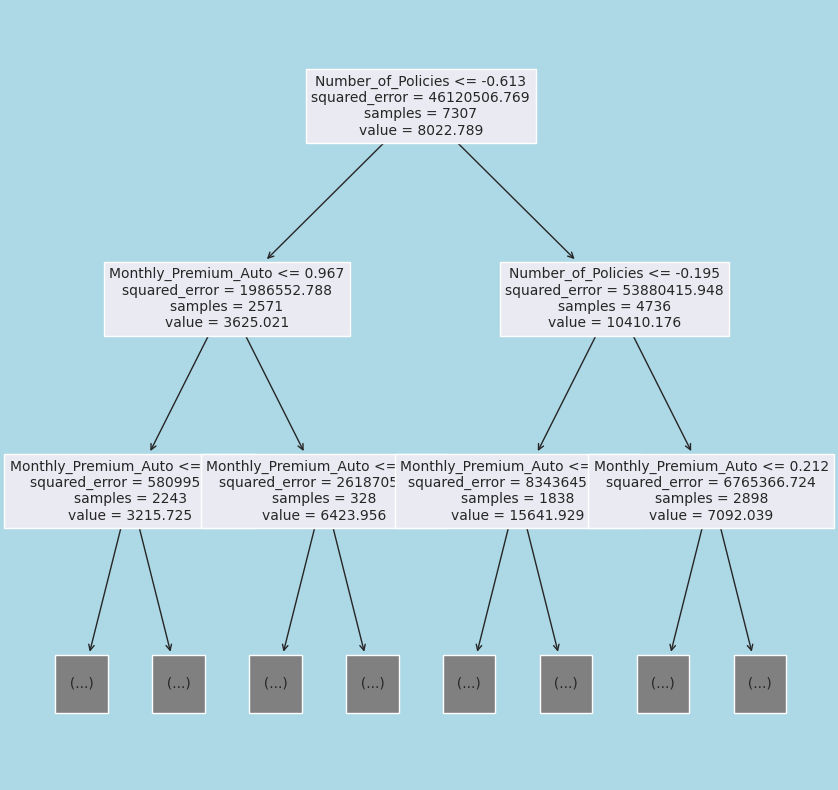

In [ ]:
from sklearn import tree as sktree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

sktree.plot_tree(tree, max_depth=2, fontsize=10, feature_names=X.columns);

**Interpretation**: Wir können anhand der Decision-Tree-Visualisierung erkennen, dass die Anzahl der Verträge den größten Einfluss auf den Customer Lifetime Value hat.
Wenn der Wert kleiner gleich -0,613 ist, spielt Monthly_Premium_Auto eine große Rolle in der Vorhersage des Customer Lifetime Values.

#####**Hyperparameter Tuning**

Wir möchten nun das Ergebnis (R^2) des Decision Trees verbessern.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
grid = {'ccp_alpha': [0.1, 0.2, 0.3],
        'criterion': ['squared_error', 'absolute_error', 'poisson', 'friedman_mse'],
        'max_depth': [None, 10, 20]}

In [ ]:
optimized_tree = RandomizedSearchCV(tree, grid, n_iter=100, n_jobs=-1, random_state=42, verbose=3)
optimized_tree.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.


RandomizedSearchCV(estimator=DecisionTreeRegressor(random_state=42), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.1, 0.2, 0.3],
                                        'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson',
                                                      'friedman_mse'],
                                        'max_depth': [None, 10, 20]},
                   random_state=42, verbose=3)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

pred_train = optimized_tree.predict(X_train)
pred_test = optimized_tree.predict(X_test)

In [ ]:
# R^2
r2 = r2_score(y_test, pred_test)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, pred_test)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, pred_test)

# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, pred_test)

# Berechnung des Bias
bias = mae_train - mae_test

# Berechnung der Varianz
variance = mse_test - mae_test**2


In [ ]:
print('R^2:', round(r2, 3))
print('MSE:', round(mse, 3))
print('MAE:', round(mae, 3))
print('MAPE:', round(mape, 3))
print('Bias:', round(bias, 3))
print('Varianz:', round(variance, 3))


R^2: 0.617
MSE: 19732139.691
MAE: 1665.175
MAPE: 12.852
Bias: -1671.954
Varianz: 23422014.221


**Ergebnis R^2:** Das Hyperparameter-Tuning erreicht eine Verbesserung der R^2 Metrik von 0,491 auf 0,617, was für eine sehr gute Anpassung der Hyperparameter spricht.

Nach dem Tuning performt der Decision Tree signifikant besser als die Ridge Regression (Von 0,16 auf 0,617 verbessert).

Der CLV kann nun um 61,7% durch die abhängige Variable (Kundenmerkmale) erklärt werden.


**Ergebnis Bias & Varianz:**

Im Falle des Bias und der Varianz hat sich dieses Modell nach dem Tuning nicht verändert.

###**Gradient Boosting**

Das Gradient Boosting bbasiert auf Entscheidungsbäumen. Es werden viele kleine, schwache Lerner, also hier Entscheidungsbäume, geschätzt, welche gemittelt das finale Modell ergeben.

In [ ]:
# Alle X skaliert, außer Dummies + y unskaliert
X = X_skaliert_ohneDummies
y = target_regression

In [ ]:
y

0        2763.519279
1        6979.535903
2       12887.431650
3        7645.861827
4        2813.692575
            ...     
9129    23405.987980
9130     3096.511217
9131     8163.890428
9132     7524.442436
9133     2611.836866
Name: Customer_Lifetime_Value, Length: 9134, dtype: float64

In [ ]:
# Alle X unskaliert + y unskaliert
#X = columns_to_scale_2
#y = target_regression

In [ ]:
# Train-Test-Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

pred_train = gb.predict(X_train)
pred_test = gb.predict(X_test)

In [ ]:
# R^2
r2 = r2_score(y_test, pred_test)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, pred_test)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, pred_test)

# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, pred_test)

# Berechnung des Bias
bias = mae_train - mae_test

# Berechnung der Varianz
variance = mse_test - mae_test**2

In [ ]:
print('R^2:', round(r2, 3))
print('MSE:', round(mse, 3))
print('MAE:', round(mae, 3))
print('MAPE:', round(mape, 3))
print('Bias:', round(bias, 3))
print('Varianz:', round(variance, 3))

R^2: 0.674
MSE: 16792274.919
MAE: 1729.768
MAPE: 13.735
Bias: -1671.954
Varianz: 23422014.221


**Ergebnis R^2:** Im Falle des Gradient Boostings hat das skalierte X erneut besser performt (R^2 = 0,674) als das unskalierte X (R^2 = 0,670).

Der CLV Value kann als unabhängige Variable nun um 67% durch die abhängigen Variablen, also den Kundenmerkmalen, geschätzt werden.

Das Gradient Boosting ist bereits vor dem Hyperparameter Tuning das beste Modell in der vorliegenden Analyse.

**Ergebnis Bias & Varianz:**

Bias und Varianz haben sich nicht geändert.

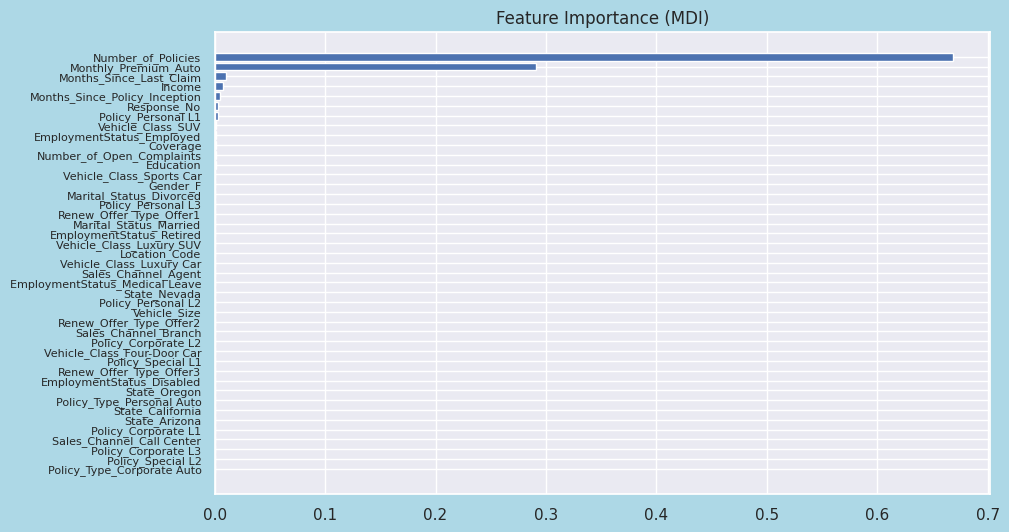

In [ ]:
feature_importance = gb.feature_importances_

sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0])

plt.figure(figsize=(10, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')

plt.yticks(pos, np.array(X.columns)[sorted_idx], fontsize=8)
plt.title('Feature Importance (MDI)')
plt.show()


**Interpretation**: Die Visualisierungergebnisse der Feature Importance decken sich mit den Ergebnissen der Decision Tree Visualisierung.

Aus der Grafik können wir erkennen, dass die Variablen Number_of_Policies und Monthly_Premium_Auto mit Abstand den stärksten Einfluss auf die Vorhersage des Customer Lifetime Values haben.

Weitere relevante Features sind:
- Months_Since_Last_Claim
- Income
- Months_Since_Policy_Inception
- Response_No
- Policy_Personal L1
- Vehicle_Class_SUV
- EmploymentStatus_Employed
- Coverage  



#####**Hyperparameter Tuning**

Wir möchten nun das Ergebnis (R^2) des Gradient Boostings verbessern.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [ ]:
grid = {
    'min_samples_split': sp_randint(2, 100),
    'min_samples_leaf': sp_randint(1, 100),
    'max_depth': sp_randint(3, 20),
    'max_features': ['auto', 'sqrt', 'log2'],
    'learning_rate': [0.01, 0.1, 0.2, 0.3]
}


In [ ]:
optimized_gb = RandomizedSearchCV(gb, grid, n_iter=10, n_jobs=-1, random_state=42, verbose=3)


In [ ]:
optimized_gb.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_featur

RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ff031cadcf0>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ff030709ba0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ff031caf2e0>},
                   random_state=42, verbose=3)

In [ ]:
best_params = optimized_gb.best_params_

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


pred_train = optimized_gb.predict(X_train)
pred_test = optimized_gb.predict(X_test)

In [ ]:
# R^2
r2 = r2_score(y_test, pred_test)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, pred_test)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, pred_test)

# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

mape = mean_absolute_percentage_error(y_test, pred_test) * 100

# Berechnung des Bias
bias = np.mean(pred_train) - np.mean(y_test)

# Berechnung der Varianz
variance = np.var(pred_test)

In [ ]:
print('R^2:', round(r2, 3))
print('MSE:', round(mse, 3))
print('MAE:', round(mae, 3))
print('MAPE:', round(mape, 3))
print('Bias:', round(bias, 3))
print('Varianz:', round(variance, 3))

R^2: 0.689
MSE: 16047173.851
MAE: 1688.65
MAPE: 13.415
Bias: 89.235
Varianz: 31079632.066


**Ergebnis R^2**: Das Gradient Boosting hat einen guten R^2-Wert von 0,689 erzielt, während es 0,617 bei dem Decision Tree war.

Wir haben in der Ausführung der Methoden beobachten können, dass die Gradient Boosting-Methode den besten R^2-Wert im Vergleich zu den anderen Modellen erzielt hat.

Der CLV kann nun um 68,9% durch die abhängige Variable (Kundenmerkmale) erklärt werden.


**Ergebnis Bias & Varianz:**
Während die Varianz immer noch sehr hoch ist mit 31079632,066, hat sich der Bias jedoch deutlich verbessert von -128,617 vor dem Tuning auf 89,235 nach dem Tuning. Also wird das vorhergesagte CLV im Durchschnitt um 89 Einheiten von den tatsächlichen CLV-Werten abweichen.






#####**Error Analysis**

Wir führen eine Error Analysis durch, um die Leistung eines Regressionmodells zu visualisieren und gleichzeitig die Fehler des Modells zu erkennen und zu analysieren, damit wir mögliche  Schwachstellen oder Muster in den Fehlern identifizieren könnnen.

Aus dem Methodenvergleich geht hervor, dass das Gradient Boosting den besten Wert erzielt hat. Aus dem Grund möchten wir hier nun die Error Analyse durchführen.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

best_gb = optimized_gb.best_estimator_

predictions = best_gb.staged_predict(X_test)

n_estimators = len(best_gb.estimators_)

test_score = np.zeros((n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(predictions):
    test_score[i] = best_gb.loss_(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.


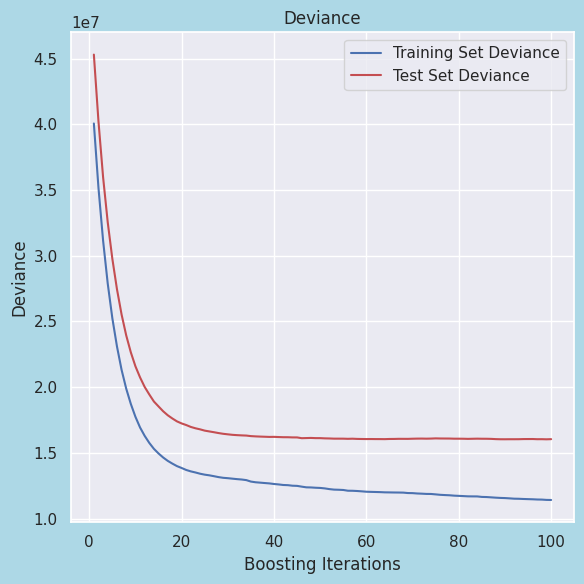

In [ ]:
# Erstellung der Deviance-Grafik
fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(n_estimators) + 1, best_gb.train_score_, 'b-', label='Training Set Deviance')
plt.plot(np.arange(n_estimators) + 1, test_score, 'r-', label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

**Interpretation**: Wie in der Grafik zu erkennen, unterscheidet sich die Trainingdatensatzlinie nicht stark von der Testdatensatzlinie. Die Testdatensatzlinie liegt über der Trainingsdatensatzlinie, was für eine gute Verarbeitungsfähigkeit von unbekannten Daten und eher gegen Overfitting hindeutet.

Das Training sollte ungefähr nach ca. 20 Iterationen gestoppt werden, da sich das Modell mit mehr Iterationen kaum ändert.

### Visualisierung der besten Methode


Als bestes Modell betrachten wir das Gradient Boosting Modell nun genauer mithilfe einer Visualisierung.

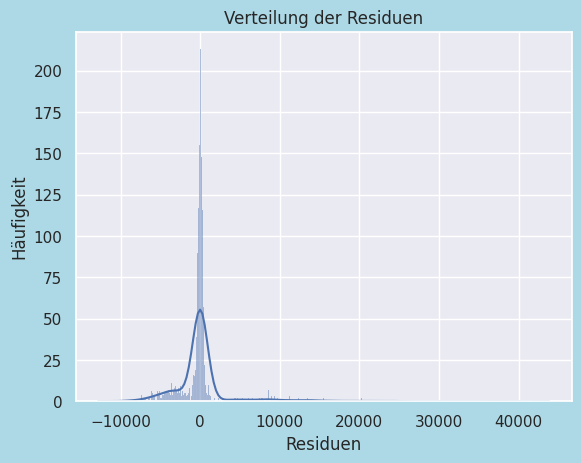

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = optimized_gb.best_estimator_.predict(X_test)

residuals = y_test - y_pred

# Verteilungsplot der Residuen
sns.histplot(residuals, kde=True)
plt.xlabel('Residuen')
plt.ylabel('Häufigkeit')
plt.title('Verteilung der Residuen')
plt.show()



**Interpretation**: Die Verteilung der Residuen gibt Aufschluss über die Genauigkeit und Gültigkeit des Modells. Da wir im folgenden Verteilungsplot eine symmetrische Verteilung um 0 haben, spricht dies für eine gute Erklärbarkeit des Modells und gegen systematische Fehler.

### Ergebnis der Multiplen linearen Regression

Die nachfolgende Tabelle fasst die R^2-Werte der besten Versuche der getesteten Modelle (inkl. der Dummy Regressor als Referenzpunkt-Modell) jeweils vor und nach dem Hyperparameter-Tuning zusammen. Falls das skalierte X besser als das unskalierte X performt hat, wurde für das unskalierte X kein HP-Tuning durchgeführt.

Obwohl der Decision Tree eine starke Verbesserung im R^2-Wert von 0,491 auf 0,617 erzielt hat, performt das **Gradient Boosting** mit dem skalierten X mit Abstand am Besten mit **0,681**.

Allgemein kann beobachtet werden, dass die Methodenauswahl vom Dummy Regressor bis zum Gradient Boosting die Performance erheblich verbessert hat und der CLV durch unser Modell nun gut schätzbar ist.

In [ ]:
from tabulate import tabulate

data = [
    ['Methode (y=unskaliert)', 'X=Skaliert', 'X=Skaliert nach HP-Tuning', 'X=Unskaliert'],
    ['Dummy Regressor', '-0,00015', 'Kein HP-Tuning', '-0,00015'],
    ['Ordinary Least Squares', '0,159', 'Kein HP-Tuning durchführbar', '0,152'],
    ['Ridge Regression', '0,159', '0,16', '0,152'],
    ['Decision Tree', '0,491', '0,617', '0,45'],
    ['Gradient Boosting', '0,674', '0,681', '0,67']
]

table = tabulate(data, headers='firstrow', tablefmt='github')

table = table.replace('0,681', '\033[91m0,681\033[0m')

print(table)


| Methode (y=unskaliert)   | X=Skaliert   | X=Skaliert nach HP-Tuning   | X=Unskaliert   |
|--------------------------|--------------|-----------------------------|----------------|
| Dummy Regressor          | -0,00015     | Kein HP-Tuning              | -0,00015       |
| Ordinary Least Squares   | 0,159        | Kein HP-Tuning durchführbar | 0,152          |
| Ridge Regression         | 0,159        | 0,16                        | 0,152          |
| Decision Tree            | 0,491        | 0,617                       | 0,45           |
| Gradient Boosting        | 0,674        | 0,681                       | 0,67           |


###**Test auf Signifikanz**

Das Gradient Boosting Modell erklärt mit 68,1% nach dem Hyperparameter-Tuning die größte Varianz aller hier durchgeführten Modelle.
Deshalb wollen wir dieses Modell etwas genauer anschauen und testen im Folgenden, welche Variablen einen signifikanten Einfluss auf den Customer Lifetime Value haben. Die signifikanten Variablen können von dem Unternehmen gezielt gesteuert werden, um den Customer Lifetime Value möglichst positiv zu beeinflussen.


In [ ]:
import scipy.stats as stats
from tabulate import tabulate

#optimierte Gradient Boosting Variante auf Signifikanz testen
X = X_skaliert_ohneDummies
y = y_unskaliert

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

from sklearn.model_selection import RandomizedSearchCV
grid = {
    'min_samples_split': sp_randint(2, 100),
    'min_samples_leaf': sp_randint(1, 100),
    'max_depth': sp_randint(3, 20),
    'max_features': ['auto', 'sqrt', 'log2'],
    'learning_rate': [0.01, 0.1, 0.2, 0.3]
}


optimized_gb = RandomizedSearchCV(gb, grid, n_iter=10, n_jobs=-1, random_state=42, verbose=3)
optimized_gb.fit(X_train, y_train)

optimized_gb.best_params_

y_pred = optimized_gb.best_estimator_.predict(X_test)
residuals = y_test - y_pred

results = []
for feature in X.columns:
    feature_values = X[feature]
    coefficient = optimized_gb.best_estimator_.feature_importances_[X.columns.get_loc(feature)]
    standard_error = np.sqrt(np.mean(residuals**2)) / np.sqrt(np.sum((feature_values - feature_values.mean())**2))
    t_value = coefficient / standard_error
    degrees_of_freedom = len(y_test) - 2
    p_value = 2 * (1 - stats.t.cdf(np.abs(t_value), degrees_of_freedom))
    results.append([feature, coefficient, standard_error, t_value, p_value])

headers = ["Feature", "Coefficient", "Standard Error", "t-Value", "p-Value"]
print(tabulate(results, headers=headers, tablefmt="fancy_grid"))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_featur

╒════════════════════════════════╤═══════════════╤══════════════════╤═══════════════╤═════════════╕
│ Feature                        │   Coefficient │   Standard Error │       t-Value │     p-Value │
╞════════════════════════════════╪═══════════════╪══════════════════╪═══════════════╪═════════════╡
│ Coverage                       │   0.000430694 │       0.00220311 │   0.195494    │ 0.845028    │
├────────────────────────────────┼───────────────┼──────────────────┼───────────────┼─────────────┤
│ Education                      │   0.000332179 │       0.00220311 │   0.150778    │ 0.880168    │
├────────────────────────────────┼───────────────┼──────────────────┼───────────────┼─────────────┤
│ Income                         │   0.00926619  │       0.00220311 │   4.20597     │ 2.72566e-05 │
├────────────────────────────────┼───────────────┼──────────────────┼───────────────┼─────────────┤
│ Location_Code                  │   8.01519e-05 │       0.00220311 │   0.0363813   │ 0.970982    │


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.


**Ergebnis:** Die signifikanten Variablen sind Income, Monthly Premium Auto und Number of Policies.

##4. Clustering

**Ziel des Clusterings:**
Wir haben die Kunden bisher nur auf Basis ihres Customer Lifetime Values betrachtet und in Klassen einsortiert (sehr abwanderungsgefährdet bis überhaupt nicht abwanderungsgefährdet). Mit dem Clustering wollen wir nun herausfinden, nach welchen weiteren Eigenschaften die Kunden in Gruppen eingeteilt werden können.
Ziel dieses Vorgehens ist es, eine gezieltere Kundenansprache auf Basis der Kundeneigenschaften zu ermöglichen und zudem "Stellschrauben" zu identifizieren, mit welchen das Unternehmen die Kundenbeziehung positiv beeinflussen kann.

**Vorgehen:**
Wir haben uns dazu entschieden, im Rahmen des Clusterings 2 Methoden miteinenader zu vergleichen: K-means und HDBSCAN.

###**K-means**

Bei dem K-means Verfahren haben wir uns zur Identifikation der Anzahl der optimalen Cluster dazu entschieden, die Elbow Methode zu verwenden.

In [ ]:
#Verwendeter Datensatz (erstellt im Abschnitt Data Preprocessing - Encoding)
X_skaliert_ohneDummies_cluster.dtypes # mit CLV_churn ohne CLV

CLV_churn                         float64
Coverage                          float64
Education                         float64
Income                            float64
Location_Code                     float64
Monthly_Premium_Auto              float64
Months_Since_Last_Claim           float64
Months_Since_Policy_Inception     float64
Number_of_Open_Complaints         float64
Number_of_Policies                float64
Vehicle_Size                      float64
State_Arizona                       uint8
State_California                    uint8
State_Nevada                        uint8
State_Oregon                        uint8
EmploymentStatus_Disabled           uint8
EmploymentStatus_Employed           uint8
EmploymentStatus_Medical Leave      uint8
EmploymentStatus_Retired            uint8
Gender_F                            uint8
Marital_Status_Divorced             uint8
Marital_Status_Married              uint8
Policy_Type_Corporate Auto          uint8
Policy_Type_Personal Auto         

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

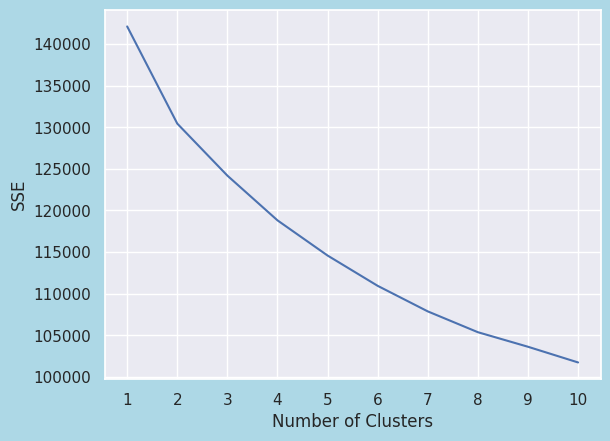

In [ ]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_skaliert_ohneDummies_cluster)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Aus der Grafik lässt sich ablesen, dass **2** die optimale Anzahl an Clustern ist.

Aufgrund dessen führen wir das folgende K-means Verfahren mit 2 Clustern durch:

In [ ]:
kmeans = KMeans(init="random", n_clusters=2, n_init=10, random_state=1)

kmeans.fit(X_skaliert_ohneDummies_cluster)

kmeans.labels_

array([1, 0, 0, ..., 0, 0, 1], dtype=int32)

In [ ]:
#Das Array hängen wir an den unskalierten, bereits bereinigten Datensatz an (siehe Data Preprocessing - Endcoding)
df_1["cluster"] = kmeans.labels_

print(df_1)

      CLV_churn Customer       State  Customer_Lifetime_Value Response  \
0             0  BU79786  Washington              2763.519279       No   
1             2  QZ44356     Arizona              6979.535903       No   
2             3  AI49188      Nevada             12887.431650       No   
3             2  WW63253  California              7645.861827       No   
4             0  HB64268  Washington              2813.692575       No   
...         ...      ...         ...                      ...      ...   
9129          3  LA72316  California             23405.987980       No   
9130          0  PK87824  California              3096.511217      Yes   
9131          2  TD14365  California              8163.890428       No   
9132          2  UP19263  California              7524.442436       No   
9133          0  Y167826  California              2611.836866       No   

      Coverage Education Effective_To_Date EmploymentStatus Gender  ...  \
0        Basic  Bachelor        2011

In [ ]:
#Hier haben wir den Customer Lifetime Value aus dem Datensatz entfernt, da unsere Zielvariable CLV_churn bereits enthalten ist und wir so die Redundanz im Datensatz vermeiden.
df_ohneCLV = df_1.drop("Customer_Lifetime_Value",1)

<ipython-input-456-f5a6a25dd906>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


In [ ]:
df_ohneCLV

,CLV_churn,Customer,State,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,...,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size,cluster
0,0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,1
1,2,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0
2,3,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0
3,2,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0
4,0,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,3,LA72316,California,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,1
9130,0,PK87824,California,Yes,Extended,College,2011-02-12,Employed,F,21604,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,1
9131,2,TD14365,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,0
9132,2,UP19263,California,No,Extended,College,2011-02-03,Employed,M,21941,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,0


In [ ]:
#Identifikation der Eigenschaften der 2 Cluster

def cat_results(df_ohneCLV, cluster_column, column_name):
    print(df_ohneCLV.groupby(cluster_column)[column_name].value_counts()/df_ohneCLV.groupby(cluster_column)[column_name].count())
    print('\n')

for cat_column in df_ohneCLV.columns[(df_ohneCLV.dtypes == 'object') | (df_ohneCLV.dtypes == 'int64')| (df_ohneCLV.dtypes == 'float64')| (df_ohneCLV.dtypes == 'str')].tolist():
    cat_results(df_ohneCLV, 'cluster', cat_column)


cluster  CLV_churn
0        3            0.477204
         2            0.392604
         1            0.120061
         0            0.010132
1        0            0.432703
         1            0.347860
         2            0.142306
         3            0.077131
Name: CLV_churn, dtype: float64


cluster  Customer
0        AA10041     0.000253
         AA30683     0.000253
         AA34092     0.000253
         AA35519     0.000253
         AA69265     0.000253
                       ...   
1        ZZ69693     0.000193
         ZZ77357     0.000193
         ZZ83340     0.000193
         ZZ89380     0.000193
         ZZ91716     0.000193
Name: Customer, Length: 9134, dtype: float64


cluster  State     
0        California    0.350557
         Oregon        0.285208
         Arizona       0.183891
         Nevada        0.098531
         Washington    0.081814
1        California    0.340532
         Oregon        0.284420
         Arizona       0.188392
         Nevada        0.095

**Interpretation der Cluster:**

Cluster 0 sind unsere rentablen Kunden. Diese zeichenen sich durch folgende Eigenschaften aus:


*   50% weisen bei der Variable Coverage die Ausprägung Extended auf
*   36% fahren einen SUV
*   48% sind überhaupt nicht abwanderungsgefährdet
*   83% haben mehr als einen Vertrag mit dem Unternehmen


Cluster 1 sind unsere weniger rentablen und abwanderungsgefährdeten Kunden. Diese zeichenen sich durch folgende Eigenschaften aus:


*   85% weisen bei der Variable Coverage die Ausprägung Basic auf
*   64% fahren einen Viertürer
*   43% sind sehr abwanderungsgefährdet
*   59% haben lediglich einen Vertrag mit dem Unternehmen



**Herausforderung bei der Interpretation der Cluster:**
Es hat sich gezeigt, dass sich die beiden Cluster durch die Variable Renew_Offer_Type ebenfalls voneinander unterscheiden lassen. Da uns jedoch keine weiteren Informationen zu den Ausprägungen dieser Variable vorliegen, können wir sie nicht sinnvoll interpretieren. Aus diesem Grund haben wir die Variable in unserer Interpretation der Cluster nicht berücksichtigt.





###**HDBSCAN**

In [ ]:
#Verwendeter Datensatz (erstellt im Abschnitt Data Preprocessing - Encoding). Der Datensatz enthält nach Löschen des Datums ausschließlich numerische Werte.
df_hdbscan = df_1_mitdummys.drop('Effective_To_Date', 1) #Datum aufgrund fehlender Interpretierbarkeit gelöscht

<ipython-input-459-2935d87b2b82>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


In [ ]:
pip install hdbscan

In [ ]:
import hdbscan

In [ ]:
hclusterer = hdbscan.HDBSCAN(min_cluster_size=50).fit(df_hdbscan)

In [ ]:
x = hclusterer.labels_

unique, counts = np.unique(x, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 2317]
 [   1 6817]]


In [ ]:
df_ohneCLV["cluster"] = x
df_ohneCLV

,CLV_churn,Customer,State,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,...,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size,cluster
0,0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,1
1,2,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0
2,3,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,1
3,2,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0
4,0,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,3,LA72316,California,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,1
9130,0,PK87824,California,Yes,Extended,College,2011-02-12,Employed,F,21604,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,1
9131,2,TD14365,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,0
9132,2,UP19263,California,No,Extended,College,2011-02-03,Employed,M,21941,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,1


In [ ]:
#Identifikation der Eigenschaften der 2 Cluster

def cat_results(df_ohneCLV, cluster_column, column_name):
    print(df_ohneCLV.groupby(cluster_column)[column_name].value_counts()/df_ohneCLV.groupby(cluster_column)[column_name].count())
    print('\n')

for cat_column in df_ohneCLV.columns[(df_ohneCLV.dtypes == 'object') | (df_ohneCLV.dtypes == 'int64')| (df_ohneCLV.dtypes == 'float64')].tolist():
    cat_results(df_ohneCLV, 'cluster', cat_column)


cluster  CLV_churn
0        0            0.273630
         2            0.258092
         1            0.238239
         3            0.230039
1        3            0.256858
         1            0.253191
         2            0.247910
         0            0.242042
Name: CLV_churn, dtype: float64


cluster  Customer
0        AA10041     0.000432
         AA30683     0.000432
         AA35519     0.000432
         AB13432     0.000432
         AB31813     0.000432
                       ...   
1        ZZ44902     0.000147
         ZZ49347     0.000147
         ZZ54454     0.000147
         ZZ83340     0.000147
         ZZ89380     0.000147
Name: Customer, Length: 9134, dtype: float64


cluster  State     
0        California    0.347000
         Oregon        0.286577
         Arizona       0.185585
         Nevada        0.093656
         Washington    0.087182
1        California    0.344140
         Oregon        0.284143
         Arizona       0.186739
         Nevada        0.097

**Interpretation der Cluster:**

Cluster 0 sind arbeitslose Singles. Diese zeichenen sich durch folgende Eigenschaften aus:


*   4% haben einen Master-Abschluss
*   91% kommen aus einem Vorort
*   100% sind arbeitslos
*   58% sind Single


Cluster 1 sind verheiratete Erwerbstätige. Diese zeichenen sich durch folgende Eigenschaften aus:


*   10% haben einen Maser-Abschluss
*   46% wohnen in der Stadt oder auf dem Land
*   über 80% sind erwerbstätig
*   66% sind verheiratet



**Herausforderung bei der Interpretation der Cluster:**
Wie bereits bei K-means beschrieben, können wir die Variable Renew_Offer_Type nicht interpretieren.
Gleiches gilt für die Variable Response mit den Ausprägungen Yes und No.

###**Vergleich der Methoden**

Wir entscheiden uns für das K-means Verfahren, da es aus Unternehmenssicht sinnvoller ist, Kunden anhand ihrer Kunden-Eigenschaften wie der Abwanderungsgefahr oder der Anzahl der Verträge zu clustern.
Das ermöglicht eine individuellere Kundenansprache.

Mit dem HDBSCAN-Verfahren erhalten wir zwar spannende Insights über die persönlichen Eigenschaften der Kunden, jedoch können wir daraus weniger Erkenntnisse für das Unternehmen und eine gezielte Kundenansprache generieren als aus den Ergebnissen des K-Means-Verfahrens. Hinzu kommt, dass die persönlichen Eigenschaften auf Basis derer die Cluster gebildet wurden vom Unternehmen nicht beeinflusst werden können.

#**Fazit, Implikationen und Herausforderungen**

**Fazit und Implikationen**

Mit unserem Projekt konnten wir die Kunden anhand der Abwanderungsgefahr in 4 Klassen einteilen, den Customer Lifetime Value vorhersagen und eine Segmentierung der Kunden anhand weiterer Eigenschaften (zusätzlich zu dem Customer Lifetime Value) vornehmen. Daraus konnten wir viele wertvolle Erkenntnisse erhalten, aus welchen sich für das Unternehmen folgende Implikationen ergeben:


*   Den weniger rentablen und abwanderungsgefährdeten Kunden (Cluster 1 bei K-means) sollte das Unternehmen spezielle Angebote bzw. Rabatte für Extended (Variable Coverage) machen.
*   Zudem sollte das Unternehmen versuchen, mit diesem Kundensegment weitere Verträge abzuschließen. Da sich gezeigt hat, dass die rentablen Kunden (Cluster 0 bei K-means) überwiegend mindestens 2 Verträge mit dem Unternehmen haben.

*   Außerdem hat die Regressionsanalyse gezeigt, dass das Unternehmen durch Beachtung der signifikanten Variablen (Income, Monthly Premium Auto und Number of Policies) den Customer Lifetime Value positiv beeinflussen und damit die Abwanderungsgefahr der Kunden senken kann.



**Herausforderungen**

*   Recherche eines geeigneten Projekt-Themas
*   Wenig Infos zu den Variablen im Datensatz und damit erschwerte Interpretation der Ergebnisse
*   Sehr hohe Ergbenis-Werte bei der Classification
*   Recherche der Clustering-Methoden
















#**Ausblick**

Ergänzend zu den von uns durchgeführten Analysen, wären nachfolgende Schritte eine sinnvolle Ergänzung:

*   Mustererkennung der falsch zugeordneten Kunden, um dann auf Basis dessen die Datenqualität innerhalb dieser Merkmale ggf. zu verbessern.
*   Die Classification mit neuen Daten erneut durchführen, um zu erkennen, wie sich die Verteilung der 4 Kundenklassen verändert. Hieraus könnte dann ein Frühwarnsystem entwicklet werden, welches Alarm schlägt, wenn der Anteil der sehr abwanderungsgefährdeten Kunden einen festgelegten Schwellenwert überschreitet.

